In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as TTS
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn import tree

from sklearn.datasets import load_boston

In [1]:
pip install autopep8

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install mixed-naive-bayes

In [58]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install h2o

  Created wheel for h2o: filename=h2o-3.32.0.4-py2.py3-none-any.whl size=164670986 sha256=eecd2e709802876b21c9fd37141a976dd8b98b99232e1a066fede00ea3f42489
  Stored in directory: c:\users\maltanno\appdata\local\pip\cache\wheels\da\09\45\0f019db4332cdbaf4687cd1937f042480dd38a48a8626c1118
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491062 sha256=edd5a107be8e8fda360fdc175b002f54497dd6925b4d80f2109942845b2f23fe
  Stored in directory: c:\users\maltanno\appdata\local\pip\cache\wheels\6e\9c\ed\4499c9865ac1002697793e0ae05ba6be33553d098f3347fb94
Successfully built h2o future
Note: you may need to restart the kernel to use updated packages.


Aborted attempt to use naive bayes for imputation:

In [5]:
pip install varname

In [ ]:
#conda install -c conda-forge scikit-learn
# from sklearn.model_selection import train_test_split as TTS
# from sklearn.preprocessing import OrdinalEncoder as OE
# from sklearn.preprocessing import LabelEncoder as LE
# from sklearn.naive_bayes import CategoricalNB as CNB
# import numpy as np
# import sklearn
# sklearn.__version__

In [ ]:
# smc.level_0.head(10)
# Xsm = df[df.scheme_management.notna()].drop(['scheme_management'], axis=1)
# ysm = df[df.scheme_management.notna()].scheme_management
# Xsm_train, Xsm_test, ysm_train, ysm_test = TTS(Xsm, ysm)
# Xsm_train = Xsm_train[smc.level_0.head(8)]
# Xsm_test = Xsm_test[smc.level_0.head(8)]
# Xsm_train.fillna('0')

In [ ]:
# oe = OE(handle_unknown='use_encoded_value', unknown_value=28875)
# oeXsm_train = oe.fit_transform(Xsm_train.select_dtypes(include='object'))
# oeXsm_test = oe.transform(Xsm_test.select_dtypes(include='object'))
# cnb = CNB()
# cnb.fit(oeXsm_train, ysm_train)
# cnb.score(oeXsm_test, ysm_test)

In [ ]:
# #aborted subvillage imputation with random forest
# from sklearn.ensemble import RandomForestClassifier as RFC
# from sklearn.model_selection import train_test_split as TTS
# rfc = RFC()
# Xsv = df[['gps_height', 'latitude', 'construction_year', 'longitude']][df.subvillage.notna()]
# ysv = df.subvillage[df.subvillage.notna()]
# Xsv_train, Xsv_test, ysv_train, ysv_test = TTS(Xsv, ysv)
# rfc.fit(Xsv_train, ysv_train)
# strain = rfc.score(Xsv_train, ysv_train)
# stest = rfc.score(Xsv_test, ysv_test)
# print(strain, stest)

In [ ]:
#pip install dython

In [3]:
import catboost as CB
from catboost.utils import get_gpu_device_count

In [4]:
get_gpu_device_count()

1

In [17]:
from sklearn.preprocessing import OrdinalEncoder as OE
import numpy as np

In [20]:
X=np.asarray([[1.2],[1.2],[1.1],[2],[100]])
oe = OE()
oe.fit_transform(X)

array([[1.],
       [1.],
       [0.],
       [2.],
       [3.]])

In [15]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define ordinal encoding
encoder = OrdinalEncoder(data)
# transform data
result = encoder.fit_transform(data)
print(result)

[['red']
 ['green']
 ['blue']]
[[2.]
 [1.]
 [0.]]


In [28]:
from category_encoders.target_encoder import TargetEncoder as TE

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.preprocessing import OrdinalEncoder as OE
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNC
from mixed_naive_bayes import MixedNB as MNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline as PL

from xgboost import XGBClassifier as XGB

import catboost as CB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix as PCM

from datetime import datetime as DT
import pickle

import matplotlib.pyplot as plt

In [ ]:
class Target_Encoder:
    encodings = {}
    
    def fit(self, df):
        
#         func = df['status_group'].value_counts(normalize=True)['functional']
#         non_func = df['status_group'].value_counts(normalize=True)['non functional']
#         self.encodings['unseen'] = (func, non_func)
        for col in df.drop('status_group', axis=1).select_dtypes('object'):
            col_f = {}
            col_nf = {}
            for cat in df[col].unique():
                try:
                    func = df[df[col] == cat]['status_group'].value_counts\
                                        (normalize=True)['functional']
                except: 
                    pass
                try:
                    non_func = df[df[col] == cat]['status_group'].value_counts\
                                        (normalize=True)['non functional']
                except:
                    pass
                col_f[cat] = func
                col_nf[cat] = non_func

            self.encodings[col] = (col_f, col_nf)
        return self

    
    
    
    def transform(self, df):
        df0 = df.copy()
        for col in df0.drop('status_group', axis=1).select_dtypes('object'):
            df0[col + '_func'] = df0[col].map(self.encodings[col][0])
            df0[col + '_nonfunc'] = df0[col].map(self.encodings[col][1])
            df0.drop(col, axis=1)
        return df0
        
            
    def fit_transform(self, df):
        self.fit(df).transform(df)
        
    
    

#To do: generalise, specify exceptions


In [3]:
df = pd.read_csv('data/cleaned.csv')

In [15]:
x = df[df.funder == 'Roman']
x.funder.map({'Roman': (0.4, 0.5)})

0        (0.4, 0.5)
80       (0.4, 0.5)
81       (0.4, 0.5)
329      (0.4, 0.5)
927      (0.4, 0.5)
            ...    
58458    (0.4, 0.5)
58532    (0.4, 0.5)
58827    (0.4, 0.5)
59095    (0.4, 0.5)
59380    (0.4, 0.5)
Name: funder, Length: 275, dtype: object

In [25]:
col='Roman'
df[col + '_func']=0

In [29]:
te = TE()


In [4]:
from sklearn.preprocessing import LabelEncoder as LE
from category_encoders.wrapper import PolynomialWrapper as PW
le = LE()

col_drop = ['extraction_type_class', 'extraction_type_group', 'management_group', 'scheme_management',
            'scheme_name', 'payment', 'quality_group', 'quantity_group', 'source_class', 'source_type',
            'waterpoint_type_group', 'wpt_name', 'amount_tsh']
X = df.drop('status_group', axis=1)
#X.drop(col_drop, axis=1, inplace=True)
y = le.fit_transform(df.status_group)
X_train, X_test, y_train, y_test = TTS(X, y, random_state=22)


In [38]:
te.fit(X_train, y_train)

TargetEncoder(cols=['funder', 'installer', 'basin', 'subvillage', 'region',
                    'lga', 'ward', 'public_meeting', 'permit',
                    'extraction_type', 'management', 'payment_type',
                    'water_quality', 'quantity', 'source', 'waterpoint_type',
                    'lga2'])

In [39]:
te.fit_transform(X_train, y_train)

,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,region_code,...,management,payment_type,water_quality,quantity,source,waterpoint_type,yrs_operation,yr_recorded,day_recorded,lga2
49598,0.835526,1045.285096,0.824684,34.180165,-2.670731,0,0.905941,0.857095,0.753229,17,...,0.699772,1.089183,0.787756,0.623199,0.954152,0.706292,15.409091,2013,23,0.836261
39298,0.850945,1841.000000,0.824684,34.611592,-9.166848,0,0.664108,0.166678,0.410969,11,...,0.528232,0.565252,0.787756,0.623199,0.725936,0.673622,18.000000,2011,124,0.836261
1821,0.340909,1472.583333,0.100000,33.880665,-9.481920,0,0.642084,0.015071,0.895379,12,...,0.918650,0.565252,0.787756,0.623199,0.674796,0.673622,9.294118,2011,207,0.836261
25345,0.788608,1685.000000,0.824684,34.650715,-9.079964,0,0.664108,0.875000,0.410969,11,...,0.528232,0.565252,0.787756,0.752215,0.725936,0.673622,33.000000,2011,185,0.836261
38951,0.424779,1045.285096,0.824684,38.774116,-4.756634,0,0.745427,0.240000,0.841631,4,...,0.918650,1.024601,1.034926,0.623199,0.865031,0.673622,9.000000,2011,74,0.836261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24932,0.837935,945.629165,0.837935,31.497897,-1.709899,0,0.905941,0.200079,0.969658,19,...,0.918650,1.024601,0.787756,0.846282,0.954152,0.706292,15.556661,2011,199,0.836261
31680,1.098120,409.000000,1.779661,38.788153,-10.244730,0,1.182583,0.837935,1.324538,8,...,0.918650,0.716495,1.034926,0.623199,0.983313,1.153713,24.928158,2013,16,0.836261
29484,1.115318,1251.000000,0.771605,30.029894,-4.833301,0,0.922049,0.590885,0.822399,16,...,0.422761,1.089183,0.787756,0.623199,0.725936,0.673622,29.000000,2013,29,0.836261
55428,1.098120,698.000000,0.824684,37.321855,-3.619035,0,0.745427,0.687082,0.676397,21,...,0.918650,0.589035,0.787756,0.846282,0.674796,0.673622,38.000000,2013,55,0.836261


In [40]:
te.transform(X_test, y_test)

,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,region_code,...,management,payment_type,water_quality,quantity,source,waterpoint_type,yrs_operation,yr_recorded,day_recorded,lga2
45834,1.098120,1042.000000,0.824684,38.632664,-5.022871,0,0.745427,0.956414,0.841631,4,...,0.918650,1.024601,0.787756,0.846282,0.674796,1.153713,2.000000,2011,76,0.836261
48324,0.656250,1229.000000,0.538647,36.925695,-3.356378,0,0.745427,0.863636,0.576541,2,...,0.918650,1.089183,0.787756,0.752215,0.725936,0.673622,5.000000,2013,3,0.836261
37846,0.732143,1045.285096,0.824684,34.180165,-2.670731,0,0.905941,0.837935,0.753229,17,...,0.699772,1.024601,0.787756,0.846282,0.954152,0.706292,5.462264,2013,50,0.836261
28689,0.789088,1454.000000,0.785481,34.710472,-5.185799,0,0.768203,0.516027,0.973907,13,...,0.918650,0.589035,0.787756,0.846282,0.983313,0.673622,13.000000,2013,45,0.821259
36268,0.170940,1467.000000,0.538647,36.854145,-3.180776,0,0.768203,0.837935,0.576541,2,...,0.699772,1.089183,0.787756,0.846282,0.674796,0.673622,4.000000,2013,246,0.836261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167,0.732143,1377.031111,0.638889,34.246801,-3.017996,0,0.905941,0.837935,0.753229,17,...,0.699772,1.024601,0.787756,0.846282,0.954152,0.706292,4.462264,2012,320,0.836261
47853,1.134578,575.000000,1.269203,34.661286,-10.697431,0,0.642084,1.687473,0.810484,10,...,1.175115,1.089183,1.687413,1.942048,0.674796,0.673622,-99.000000,2013,246,0.836261
15025,0.550898,1045.285096,0.824684,33.606981,-3.011323,0,0.905941,0.837935,0.753229,17,...,0.699772,1.024601,0.787756,0.623199,0.954152,0.706292,16.431482,2012,284,0.836261
27434,0.850945,488.000000,0.887768,34.655951,-11.104685,0,0.642084,0.837935,0.810484,10,...,0.918650,0.565252,0.787756,0.623199,0.674796,1.153713,21.000000,2013,275,0.836261


In [42]:
pw = PW(TE())

In [46]:
Xpw = pw.fit_transform(X_train, y_train)

In [49]:
pw.transform(X_test)

,gps_height,longitude,latitude,num_private,region_code,district_code,population,yrs_operation,yr_recorded,day_recorded,...,public_meeting_1.0,permit_1.0,extraction_type_1.0,management_1.0,payment_type_1.0,water_quality_1.0,quantity_1.0,source_1.0,waterpoint_type_1.0,lga2_1.0
45834,1042.000000,38.632664,-5.022871,0,4,3,60.000000,2.000000,2011,76,...,0.071583,0.073591,0.071794,0.071745,0.070282,0.071741,0.070610,0.070447,0.071142,0.073058
48324,1229.000000,36.925695,-3.356378,0,2,7,130.000000,5.000000,2013,3,...,0.071583,0.073591,0.071794,0.071745,0.074607,0.071741,0.074219,0.070844,0.071513,0.073058
37846,1045.285096,34.180165,-2.670731,0,17,1,452.556604,5.462264,2013,50,...,0.071583,0.073591,0.072672,0.077029,0.070282,0.071741,0.070610,0.072731,0.073405,0.073058
28689,1454.000000,34.710472,-5.185799,0,13,2,1.000000,13.000000,2013,45,...,0.071583,0.072941,0.078287,0.071745,0.071597,0.071741,0.070610,0.071785,0.071513,0.066356
36268,1467.000000,36.854145,-3.180776,0,2,7,120.000000,4.000000,2013,246,...,0.071583,0.071158,0.071794,0.077029,0.074607,0.071741,0.070610,0.070447,0.071513,0.073058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167,1377.031111,34.246801,-3.017996,0,17,6,452.556604,4.462264,2012,320,...,0.071583,0.071158,0.072672,0.077029,0.070282,0.071741,0.070610,0.072731,0.073405,0.073058
47853,575.000000,34.661286,-10.697431,0,10,3,1.000000,-99.000000,2013,246,...,0.069692,0.071158,0.071794,0.052147,0.074607,0.062558,0.072896,0.070447,0.071513,0.073058
15025,1045.285096,33.606981,-3.011323,0,17,2,302.579021,16.431482,2012,284,...,0.071583,0.073591,0.072672,0.077029,0.070282,0.071741,0.072603,0.072731,0.073405,0.073058
27434,488.000000,34.655951,-11.104685,0,10,3,98.000000,21.000000,2013,275,...,0.071583,0.071158,0.071794,0.071745,0.069748,0.071741,0.072603,0.070447,0.071142,0.073058


In [84]:
pip install ipywidgets

In [5]:
from catboost import CatBoostClassifier as CBC

In [6]:
cbc = CBC(random_seed=22, task_type='GPU')

In [44]:
cbc.fit(X_train, y_train, cat_features=X.select_dtypes('object').columns, 
        eval_set=(X_test, y_test))

Learning rate set to 0.1543
0:	learn: 1.0383830	test: 1.0395289	best: 1.0395289 (0)	total: 40.3ms	remaining: 40.3s
1:	learn: 0.9761388	test: 0.9729136	best: 0.9729136 (1)	total: 73.2ms	remaining: 36.5s
2:	learn: 0.9271811	test: 0.9227107	best: 0.9227107 (2)	total: 105ms	remaining: 34.9s
3:	learn: 0.8912958	test: 0.8854737	best: 0.8854737 (3)	total: 139ms	remaining: 34.7s
4:	learn: 0.8385668	test: 0.8331729	best: 0.8331729 (4)	total: 174ms	remaining: 34.6s
5:	learn: 0.8008172	test: 0.7957785	best: 0.7957785 (5)	total: 209ms	remaining: 34.6s
6:	learn: 0.7729287	test: 0.7682420	best: 0.7682420 (6)	total: 241ms	remaining: 34.1s
7:	learn: 0.7515956	test: 0.7472518	best: 0.7472518 (7)	total: 283ms	remaining: 35.1s
8:	learn: 0.7328265	test: 0.7284774	best: 0.7284774 (8)	total: 323ms	remaining: 35.5s
9:	learn: 0.7166049	test: 0.7125489	best: 0.7125489 (9)	total: 356ms	remaining: 35.2s
10:	learn: 0.7025359	test: 0.6986503	best: 0.6986503 (10)	total: 384ms	remaining: 34.5s
11:	learn: 0.6917430	t

94:	learn: 0.5309766	test: 0.5367974	best: 0.5367974 (94)	total: 3.37s	remaining: 32.1s
95:	learn: 0.5308408	test: 0.5367001	best: 0.5367001 (95)	total: 3.41s	remaining: 32.1s
96:	learn: 0.5304385	test: 0.5364699	best: 0.5364699 (96)	total: 3.44s	remaining: 32.1s
97:	learn: 0.5303343	test: 0.5364107	best: 0.5364107 (97)	total: 3.47s	remaining: 32s
98:	learn: 0.5298315	test: 0.5360795	best: 0.5360795 (98)	total: 3.5s	remaining: 31.9s
99:	learn: 0.5294221	test: 0.5358133	best: 0.5358133 (99)	total: 3.54s	remaining: 31.9s
100:	learn: 0.5289817	test: 0.5354958	best: 0.5354958 (100)	total: 3.58s	remaining: 31.9s
101:	learn: 0.5280964	test: 0.5348061	best: 0.5348061 (101)	total: 3.61s	remaining: 31.8s
102:	learn: 0.5279349	test: 0.5346663	best: 0.5346663 (102)	total: 3.64s	remaining: 31.7s
103:	learn: 0.5271723	test: 0.5343071	best: 0.5343071 (103)	total: 3.67s	remaining: 31.7s
104:	learn: 0.5268085	test: 0.5339429	best: 0.5339429 (104)	total: 3.71s	remaining: 31.6s
105:	learn: 0.5264261	tes

187:	learn: 0.5006132	test: 0.5184926	best: 0.5184926 (187)	total: 6.6s	remaining: 28.5s
188:	learn: 0.5005051	test: 0.5184349	best: 0.5184349 (188)	total: 6.64s	remaining: 28.5s
189:	learn: 0.5003721	test: 0.5183619	best: 0.5183619 (189)	total: 6.68s	remaining: 28.5s
190:	learn: 0.5001918	test: 0.5183374	best: 0.5183374 (190)	total: 6.71s	remaining: 28.4s
191:	learn: 0.4999723	test: 0.5182383	best: 0.5182383 (191)	total: 6.74s	remaining: 28.4s
192:	learn: 0.4995698	test: 0.5180035	best: 0.5180035 (192)	total: 6.77s	remaining: 28.3s
193:	learn: 0.4993369	test: 0.5178289	best: 0.5178289 (193)	total: 6.81s	remaining: 28.3s
194:	learn: 0.4991762	test: 0.5177442	best: 0.5177442 (194)	total: 6.85s	remaining: 28.3s
195:	learn: 0.4989838	test: 0.5176774	best: 0.5176774 (195)	total: 6.88s	remaining: 28.2s
196:	learn: 0.4987840	test: 0.5176523	best: 0.5176523 (196)	total: 6.92s	remaining: 28.2s
197:	learn: 0.4985387	test: 0.5175457	best: 0.5175457 (197)	total: 6.95s	remaining: 28.2s
198:	learn:

283:	learn: 0.4797799	test: 0.5077273	best: 0.5077198 (282)	total: 9.93s	remaining: 25s
284:	learn: 0.4792013	test: 0.5074308	best: 0.5074308 (284)	total: 9.97s	remaining: 25s
285:	learn: 0.4789849	test: 0.5072457	best: 0.5072457 (285)	total: 10s	remaining: 25s
286:	learn: 0.4788021	test: 0.5071239	best: 0.5071239 (286)	total: 10s	remaining: 24.9s
287:	learn: 0.4787224	test: 0.5071032	best: 0.5071032 (287)	total: 10.1s	remaining: 24.9s
288:	learn: 0.4785228	test: 0.5070296	best: 0.5070296 (288)	total: 10.1s	remaining: 24.9s
289:	learn: 0.4783856	test: 0.5070259	best: 0.5070259 (289)	total: 10.1s	remaining: 24.8s
290:	learn: 0.4782164	test: 0.5069617	best: 0.5069617 (290)	total: 10.2s	remaining: 24.8s
291:	learn: 0.4780063	test: 0.5068989	best: 0.5068989 (291)	total: 10.2s	remaining: 24.8s
292:	learn: 0.4779076	test: 0.5068334	best: 0.5068334 (292)	total: 10.2s	remaining: 24.7s
293:	learn: 0.4778065	test: 0.5068265	best: 0.5068265 (293)	total: 10.3s	remaining: 24.6s
294:	learn: 0.477701

376:	learn: 0.4623110	test: 0.5020599	best: 0.5020599 (376)	total: 13s	remaining: 21.4s
377:	learn: 0.4619754	test: 0.5019042	best: 0.5019042 (377)	total: 13s	remaining: 21.4s
378:	learn: 0.4618691	test: 0.5018386	best: 0.5018386 (378)	total: 13s	remaining: 21.3s
379:	learn: 0.4617579	test: 0.5017608	best: 0.5017608 (379)	total: 13.1s	remaining: 21.3s
380:	learn: 0.4616641	test: 0.5016653	best: 0.5016653 (380)	total: 13.1s	remaining: 21.3s
381:	learn: 0.4615256	test: 0.5015814	best: 0.5015814 (381)	total: 13.1s	remaining: 21.2s
382:	learn: 0.4613475	test: 0.5015002	best: 0.5015002 (382)	total: 13.2s	remaining: 21.2s
383:	learn: 0.4612238	test: 0.5015579	best: 0.5015002 (382)	total: 13.2s	remaining: 21.2s
384:	learn: 0.4609132	test: 0.5014205	best: 0.5014205 (384)	total: 13.2s	remaining: 21.1s
385:	learn: 0.4607331	test: 0.5013302	best: 0.5013302 (385)	total: 13.2s	remaining: 21.1s
386:	learn: 0.4604824	test: 0.5012738	best: 0.5012738 (386)	total: 13.3s	remaining: 21s
387:	learn: 0.4603

470:	learn: 0.4484994	test: 0.4980241	best: 0.4980241 (470)	total: 15.9s	remaining: 17.8s
471:	learn: 0.4483824	test: 0.4980454	best: 0.4980241 (470)	total: 15.9s	remaining: 17.8s
472:	learn: 0.4483193	test: 0.4980712	best: 0.4980241 (470)	total: 15.9s	remaining: 17.8s
473:	learn: 0.4481254	test: 0.4980151	best: 0.4980151 (473)	total: 16s	remaining: 17.7s
474:	learn: 0.4480303	test: 0.4979489	best: 0.4979489 (474)	total: 16s	remaining: 17.7s
475:	learn: 0.4478864	test: 0.4979347	best: 0.4979347 (475)	total: 16s	remaining: 17.6s
476:	learn: 0.4478152	test: 0.4979398	best: 0.4979347 (475)	total: 16s	remaining: 17.6s
477:	learn: 0.4477110	test: 0.4978954	best: 0.4978954 (477)	total: 16.1s	remaining: 17.6s
478:	learn: 0.4474802	test: 0.4978081	best: 0.4978081 (478)	total: 16.1s	remaining: 17.5s
479:	learn: 0.4473484	test: 0.4978478	best: 0.4978081 (478)	total: 16.1s	remaining: 17.5s
480:	learn: 0.4472377	test: 0.4978570	best: 0.4978081 (478)	total: 16.2s	remaining: 17.4s
481:	learn: 0.4470

562:	learn: 0.4362852	test: 0.4942305	best: 0.4942305 (562)	total: 18.4s	remaining: 14.3s
563:	learn: 0.4361198	test: 0.4941670	best: 0.4941670 (563)	total: 18.5s	remaining: 14.3s
564:	learn: 0.4359954	test: 0.4941470	best: 0.4941470 (564)	total: 18.5s	remaining: 14.2s
565:	learn: 0.4359268	test: 0.4941063	best: 0.4941063 (565)	total: 18.5s	remaining: 14.2s
566:	learn: 0.4357688	test: 0.4940698	best: 0.4940698 (566)	total: 18.5s	remaining: 14.2s
567:	learn: 0.4356649	test: 0.4940896	best: 0.4940698 (566)	total: 18.6s	remaining: 14.1s
568:	learn: 0.4356138	test: 0.4940793	best: 0.4940698 (566)	total: 18.6s	remaining: 14.1s
569:	learn: 0.4355070	test: 0.4940551	best: 0.4940551 (569)	total: 18.6s	remaining: 14.1s
570:	learn: 0.4353204	test: 0.4939771	best: 0.4939771 (570)	total: 18.7s	remaining: 14s
571:	learn: 0.4352412	test: 0.4939601	best: 0.4939601 (571)	total: 18.7s	remaining: 14s
572:	learn: 0.4350784	test: 0.4938792	best: 0.4938792 (572)	total: 18.7s	remaining: 13.9s
573:	learn: 0.

659:	learn: 0.4240874	test: 0.4920606	best: 0.4920606 (659)	total: 21.1s	remaining: 10.9s
660:	learn: 0.4239418	test: 0.4919466	best: 0.4919466 (660)	total: 21.2s	remaining: 10.8s
661:	learn: 0.4238725	test: 0.4919155	best: 0.4919155 (661)	total: 21.2s	remaining: 10.8s
662:	learn: 0.4237763	test: 0.4918950	best: 0.4918950 (662)	total: 21.2s	remaining: 10.8s
663:	learn: 0.4236702	test: 0.4918250	best: 0.4918250 (663)	total: 21.2s	remaining: 10.7s
664:	learn: 0.4235820	test: 0.4918457	best: 0.4918250 (663)	total: 21.2s	remaining: 10.7s
665:	learn: 0.4234178	test: 0.4919069	best: 0.4918250 (663)	total: 21.3s	remaining: 10.7s
666:	learn: 0.4233551	test: 0.4919220	best: 0.4918250 (663)	total: 21.3s	remaining: 10.6s
667:	learn: 0.4231473	test: 0.4918601	best: 0.4918250 (663)	total: 21.3s	remaining: 10.6s
668:	learn: 0.4230409	test: 0.4918633	best: 0.4918250 (663)	total: 21.4s	remaining: 10.6s
669:	learn: 0.4229583	test: 0.4919006	best: 0.4918250 (663)	total: 21.4s	remaining: 10.5s
670:	learn

752:	learn: 0.4131332	test: 0.4905937	best: 0.4905742 (740)	total: 23.7s	remaining: 7.78s
753:	learn: 0.4130478	test: 0.4905936	best: 0.4905742 (740)	total: 23.8s	remaining: 7.75s
754:	learn: 0.4129284	test: 0.4905831	best: 0.4905742 (740)	total: 23.8s	remaining: 7.72s
755:	learn: 0.4128413	test: 0.4905763	best: 0.4905742 (740)	total: 23.8s	remaining: 7.69s
756:	learn: 0.4126378	test: 0.4905356	best: 0.4905356 (756)	total: 23.8s	remaining: 7.65s
757:	learn: 0.4125742	test: 0.4904712	best: 0.4904712 (757)	total: 23.9s	remaining: 7.62s
758:	learn: 0.4125495	test: 0.4904780	best: 0.4904712 (757)	total: 23.9s	remaining: 7.59s
759:	learn: 0.4124676	test: 0.4904265	best: 0.4904265 (759)	total: 23.9s	remaining: 7.55s
760:	learn: 0.4123573	test: 0.4904149	best: 0.4904149 (760)	total: 23.9s	remaining: 7.52s
761:	learn: 0.4122437	test: 0.4904407	best: 0.4904149 (760)	total: 24s	remaining: 7.49s
762:	learn: 0.4120690	test: 0.4904130	best: 0.4904130 (762)	total: 24s	remaining: 7.46s
763:	learn: 0.

849:	learn: 0.4022868	test: 0.4895751	best: 0.4895751 (849)	total: 26.4s	remaining: 4.65s
850:	learn: 0.4021823	test: 0.4895127	best: 0.4895127 (850)	total: 26.4s	remaining: 4.62s
851:	learn: 0.4021404	test: 0.4895162	best: 0.4895127 (850)	total: 26.4s	remaining: 4.59s
852:	learn: 0.4020789	test: 0.4895053	best: 0.4895053 (852)	total: 26.5s	remaining: 4.56s
853:	learn: 0.4018422	test: 0.4895064	best: 0.4895053 (852)	total: 26.5s	remaining: 4.53s
854:	learn: 0.4017851	test: 0.4894916	best: 0.4894916 (854)	total: 26.5s	remaining: 4.49s
855:	learn: 0.4017489	test: 0.4894770	best: 0.4894770 (855)	total: 26.6s	remaining: 4.47s
856:	learn: 0.4015525	test: 0.4894411	best: 0.4894411 (856)	total: 26.6s	remaining: 4.44s
857:	learn: 0.4013874	test: 0.4895023	best: 0.4894411 (856)	total: 26.6s	remaining: 4.41s
858:	learn: 0.4013280	test: 0.4895081	best: 0.4894411 (856)	total: 26.6s	remaining: 4.37s
859:	learn: 0.4012382	test: 0.4895514	best: 0.4894411 (856)	total: 26.7s	remaining: 4.34s
860:	learn

946:	learn: 0.3926197	test: 0.4884169	best: 0.4882355 (938)	total: 29s	remaining: 1.62s
947:	learn: 0.3923485	test: 0.4882890	best: 0.4882355 (938)	total: 29.1s	remaining: 1.59s
948:	learn: 0.3922959	test: 0.4882789	best: 0.4882355 (938)	total: 29.1s	remaining: 1.56s
949:	learn: 0.3922084	test: 0.4883042	best: 0.4882355 (938)	total: 29.1s	remaining: 1.53s
950:	learn: 0.3921461	test: 0.4883096	best: 0.4882355 (938)	total: 29.1s	remaining: 1.5s
951:	learn: 0.3920875	test: 0.4883646	best: 0.4882355 (938)	total: 29.2s	remaining: 1.47s
952:	learn: 0.3919844	test: 0.4883343	best: 0.4882355 (938)	total: 29.2s	remaining: 1.44s
953:	learn: 0.3919172	test: 0.4882841	best: 0.4882355 (938)	total: 29.2s	remaining: 1.41s
954:	learn: 0.3917646	test: 0.4882152	best: 0.4882152 (954)	total: 29.2s	remaining: 1.38s
955:	learn: 0.3916368	test: 0.4882447	best: 0.4882152 (954)	total: 29.3s	remaining: 1.35s
956:	learn: 0.3914912	test: 0.4882142	best: 0.4882142 (956)	total: 29.3s	remaining: 1.32s
957:	learn: 0

In [45]:
cbc.score(X_train, y_train)

0.852682379349046

In [1]:
cbc.score(X_test, y_test)

NameError: name 'cbc' is not defined

In [90]:
cbc.feature_importances_

array([ 6.45182629,  2.20514697,  3.48083994,  1.94038622,  1.97454711,
        0.22552858,  2.64219347,  3.24836289,  3.03907104,  0.69895973,
        0.83915431,  9.6008971 , 11.00445751,  3.99891312,  1.83090242,
        1.74066753,  6.8426256 ,  3.10650103,  4.96117656,  1.32894238,
       10.67541254,  4.71386735,  4.83116323,  4.73530598,  0.28430232,
        2.66486076,  0.93398802])

In [11]:
cbc.fit(X_train, y_train, cat_features=X.select_dtypes('object').columns, 
        eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.116494
0:	learn: 1.0046785	test: 1.0051281	best: 1.0051281 (0)	total: 1.01s	remaining: 16m 52s
1:	learn: 0.9346446	test: 0.9358494	best: 0.9358494 (1)	total: 1.92s	remaining: 15m 55s
2:	learn: 0.8792887	test: 0.8796504	best: 0.8796504 (2)	total: 2.71s	remaining: 14m 59s
3:	learn: 0.8360897	test: 0.8362136	best: 0.8362136 (3)	total: 3.49s	remaining: 14m 28s
4:	learn: 0.8012561	test: 0.8010963	best: 0.8010963 (4)	total: 4.27s	remaining: 14m 10s
5:	learn: 0.7719571	test: 0.7719532	best: 0.7719532 (5)	total: 5.16s	remaining: 14m 15s
6:	learn: 0.7482799	test: 0.7483927	best: 0.7483927 (6)	total: 5.97s	remaining: 14m 6s
7:	learn: 0.7248837	test: 0.7236865	best: 0.7236865 (7)	total: 6.76s	remaining: 13m 58s
8:	learn: 0.7060293	test: 0.7041467	best: 0.7041467 (8)	total: 7.52s	remaining: 13m 47s
9:	learn: 0.6896914	test: 0.6862615	best: 0.6862615 (9)	total: 8.29s	remaining: 13m 40s
10:	learn: 0.6743539	test: 0.6698563	best: 0.6698563 (10)	total: 9.09s	remaining: 13m 37s
1

92:	learn: 0.5194610	test: 0.5085008	best: 0.5085008 (92)	total: 1m 17s	remaining: 12m 38s
93:	learn: 0.5190755	test: 0.5083430	best: 0.5083430 (93)	total: 1m 18s	remaining: 12m 38s
94:	learn: 0.5186312	test: 0.5080878	best: 0.5080878 (94)	total: 1m 19s	remaining: 12m 37s
95:	learn: 0.5177589	test: 0.5074904	best: 0.5074904 (95)	total: 1m 20s	remaining: 12m 36s
96:	learn: 0.5176112	test: 0.5073685	best: 0.5073685 (96)	total: 1m 21s	remaining: 12m 35s
97:	learn: 0.5173281	test: 0.5071420	best: 0.5071420 (97)	total: 1m 22s	remaining: 12m 35s
98:	learn: 0.5167685	test: 0.5064815	best: 0.5064815 (98)	total: 1m 22s	remaining: 12m 34s
99:	learn: 0.5163141	test: 0.5062293	best: 0.5062293 (99)	total: 1m 23s	remaining: 12m 32s
100:	learn: 0.5159305	test: 0.5059975	best: 0.5059975 (100)	total: 1m 24s	remaining: 12m 32s
101:	learn: 0.5156550	test: 0.5057452	best: 0.5057452 (101)	total: 1m 25s	remaining: 12m 31s
102:	learn: 0.5153708	test: 0.5055649	best: 0.5055649 (102)	total: 1m 26s	remaining: 1

181:	learn: 0.4979022	test: 0.4941787	best: 0.4941787 (181)	total: 2m 35s	remaining: 11m 37s
182:	learn: 0.4977574	test: 0.4940833	best: 0.4940833 (182)	total: 2m 36s	remaining: 11m 36s
183:	learn: 0.4975936	test: 0.4940205	best: 0.4940205 (183)	total: 2m 36s	remaining: 11m 36s
184:	learn: 0.4974947	test: 0.4939909	best: 0.4939909 (184)	total: 2m 37s	remaining: 11m 35s
185:	learn: 0.4972880	test: 0.4939058	best: 0.4939058 (185)	total: 2m 38s	remaining: 11m 34s
186:	learn: 0.4972028	test: 0.4938613	best: 0.4938613 (186)	total: 2m 39s	remaining: 11m 33s
187:	learn: 0.4969387	test: 0.4936153	best: 0.4936153 (187)	total: 2m 40s	remaining: 11m 32s
188:	learn: 0.4967562	test: 0.4935264	best: 0.4935264 (188)	total: 2m 41s	remaining: 11m 32s
189:	learn: 0.4966096	test: 0.4934534	best: 0.4934534 (189)	total: 2m 42s	remaining: 11m 32s
190:	learn: 0.4964683	test: 0.4933564	best: 0.4933564 (190)	total: 2m 43s	remaining: 11m 32s
191:	learn: 0.4962081	test: 0.4931347	best: 0.4931347 (191)	total: 2m 

270:	learn: 0.4843872	test: 0.4875466	best: 0.4875466 (270)	total: 3m 50s	remaining: 10m 19s
271:	learn: 0.4842456	test: 0.4874355	best: 0.4874355 (271)	total: 3m 50s	remaining: 10m 18s
272:	learn: 0.4841465	test: 0.4873486	best: 0.4873486 (272)	total: 3m 51s	remaining: 10m 17s
273:	learn: 0.4840074	test: 0.4873036	best: 0.4873036 (273)	total: 3m 52s	remaining: 10m 16s
274:	learn: 0.4839775	test: 0.4872937	best: 0.4872937 (274)	total: 3m 53s	remaining: 10m 15s
275:	learn: 0.4838677	test: 0.4872523	best: 0.4872523 (275)	total: 3m 54s	remaining: 10m 14s
276:	learn: 0.4837715	test: 0.4872539	best: 0.4872523 (275)	total: 3m 55s	remaining: 10m 13s
277:	learn: 0.4836345	test: 0.4872216	best: 0.4872216 (277)	total: 3m 55s	remaining: 10m 12s
278:	learn: 0.4835801	test: 0.4871994	best: 0.4871994 (278)	total: 3m 56s	remaining: 10m 11s
279:	learn: 0.4834673	test: 0.4871887	best: 0.4871887 (279)	total: 3m 57s	remaining: 10m 10s
280:	learn: 0.4833986	test: 0.4871787	best: 0.4871787 (280)	total: 3m 

360:	learn: 0.4742175	test: 0.4834733	best: 0.4834491 (358)	total: 5m 6s	remaining: 9m 1s
361:	learn: 0.4740879	test: 0.4833821	best: 0.4833821 (361)	total: 5m 7s	remaining: 9m 1s
362:	learn: 0.4740618	test: 0.4833680	best: 0.4833680 (362)	total: 5m 8s	remaining: 9m
363:	learn: 0.4740383	test: 0.4833727	best: 0.4833680 (362)	total: 5m 9s	remaining: 9m
364:	learn: 0.4739909	test: 0.4833398	best: 0.4833398 (364)	total: 5m 10s	remaining: 8m 59s
365:	learn: 0.4739514	test: 0.4833361	best: 0.4833361 (365)	total: 5m 11s	remaining: 8m 59s
366:	learn: 0.4739066	test: 0.4833005	best: 0.4833005 (366)	total: 5m 12s	remaining: 8m 58s
367:	learn: 0.4737949	test: 0.4832731	best: 0.4832731 (367)	total: 5m 13s	remaining: 8m 58s
368:	learn: 0.4736510	test: 0.4832144	best: 0.4832144 (368)	total: 5m 14s	remaining: 8m 58s
369:	learn: 0.4735771	test: 0.4831764	best: 0.4831764 (369)	total: 5m 15s	remaining: 8m 57s
370:	learn: 0.4733759	test: 0.4831331	best: 0.4831331 (370)	total: 5m 17s	remaining: 8m 57s
37

450:	learn: 0.4651723	test: 0.4804315	best: 0.4804315 (450)	total: 6m 29s	remaining: 7m 53s
451:	learn: 0.4649770	test: 0.4803453	best: 0.4803453 (451)	total: 6m 30s	remaining: 7m 52s
452:	learn: 0.4648994	test: 0.4803046	best: 0.4803046 (452)	total: 6m 31s	remaining: 7m 52s
453:	learn: 0.4646936	test: 0.4802400	best: 0.4802400 (453)	total: 6m 32s	remaining: 7m 51s
454:	learn: 0.4646370	test: 0.4802009	best: 0.4802009 (454)	total: 6m 32s	remaining: 7m 50s
455:	learn: 0.4644761	test: 0.4801258	best: 0.4801258 (455)	total: 6m 33s	remaining: 7m 49s
456:	learn: 0.4643186	test: 0.4800819	best: 0.4800819 (456)	total: 6m 34s	remaining: 7m 48s
457:	learn: 0.4642064	test: 0.4800719	best: 0.4800719 (457)	total: 6m 35s	remaining: 7m 48s
458:	learn: 0.4640980	test: 0.4800639	best: 0.4800639 (458)	total: 6m 36s	remaining: 7m 47s
459:	learn: 0.4640581	test: 0.4800504	best: 0.4800504 (459)	total: 6m 37s	remaining: 7m 46s
460:	learn: 0.4638585	test: 0.4800112	best: 0.4800112 (460)	total: 6m 38s	remain

540:	learn: 0.4559401	test: 0.4773723	best: 0.4773723 (540)	total: 7m 50s	remaining: 6m 39s
541:	learn: 0.4557958	test: 0.4773149	best: 0.4773149 (541)	total: 7m 51s	remaining: 6m 38s
542:	learn: 0.4556409	test: 0.4773003	best: 0.4773003 (542)	total: 7m 52s	remaining: 6m 37s
543:	learn: 0.4556144	test: 0.4772942	best: 0.4772942 (543)	total: 7m 53s	remaining: 6m 36s
544:	learn: 0.4555586	test: 0.4772734	best: 0.4772734 (544)	total: 7m 53s	remaining: 6m 35s
545:	learn: 0.4554672	test: 0.4772778	best: 0.4772734 (544)	total: 7m 54s	remaining: 6m 34s
546:	learn: 0.4553396	test: 0.4772743	best: 0.4772734 (544)	total: 7m 55s	remaining: 6m 33s
547:	learn: 0.4551956	test: 0.4771971	best: 0.4771971 (547)	total: 7m 56s	remaining: 6m 33s
548:	learn: 0.4551594	test: 0.4771925	best: 0.4771925 (548)	total: 7m 57s	remaining: 6m 32s
549:	learn: 0.4549392	test: 0.4771415	best: 0.4771415 (549)	total: 7m 58s	remaining: 6m 31s
550:	learn: 0.4547967	test: 0.4771839	best: 0.4771415 (549)	total: 7m 59s	remain

630:	learn: 0.4482106	test: 0.4755866	best: 0.4755821 (629)	total: 9m 14s	remaining: 5m 23s
631:	learn: 0.4481384	test: 0.4755196	best: 0.4755196 (631)	total: 9m 15s	remaining: 5m 23s
632:	learn: 0.4480303	test: 0.4755263	best: 0.4755196 (631)	total: 9m 16s	remaining: 5m 22s
633:	learn: 0.4479167	test: 0.4755424	best: 0.4755196 (631)	total: 9m 16s	remaining: 5m 21s
634:	learn: 0.4478469	test: 0.4755011	best: 0.4755011 (634)	total: 9m 17s	remaining: 5m 20s
635:	learn: 0.4477912	test: 0.4754797	best: 0.4754797 (635)	total: 9m 18s	remaining: 5m 19s
636:	learn: 0.4477281	test: 0.4754752	best: 0.4754752 (636)	total: 9m 19s	remaining: 5m 19s
637:	learn: 0.4476603	test: 0.4754522	best: 0.4754522 (637)	total: 9m 20s	remaining: 5m 18s
638:	learn: 0.4475073	test: 0.4754366	best: 0.4754366 (638)	total: 9m 21s	remaining: 5m 17s
639:	learn: 0.4474821	test: 0.4754315	best: 0.4754315 (639)	total: 9m 22s	remaining: 5m 16s
640:	learn: 0.4473724	test: 0.4753857	best: 0.4753857 (640)	total: 9m 23s	remain

719:	learn: 0.4404070	test: 0.4738196	best: 0.4738196 (719)	total: 10m 36s	remaining: 4m 7s
720:	learn: 0.4403472	test: 0.4738071	best: 0.4738071 (720)	total: 10m 37s	remaining: 4m 6s
721:	learn: 0.4402889	test: 0.4737977	best: 0.4737977 (721)	total: 10m 38s	remaining: 4m 5s
722:	learn: 0.4400609	test: 0.4738195	best: 0.4737977 (721)	total: 10m 39s	remaining: 4m 5s
723:	learn: 0.4399784	test: 0.4737929	best: 0.4737929 (723)	total: 10m 40s	remaining: 4m 4s
724:	learn: 0.4399271	test: 0.4737944	best: 0.4737929 (723)	total: 10m 41s	remaining: 4m 3s
725:	learn: 0.4397685	test: 0.4737893	best: 0.4737893 (725)	total: 10m 42s	remaining: 4m 2s
726:	learn: 0.4396521	test: 0.4737526	best: 0.4737526 (726)	total: 10m 43s	remaining: 4m 1s
727:	learn: 0.4395007	test: 0.4736402	best: 0.4736402 (727)	total: 10m 44s	remaining: 4m
728:	learn: 0.4393869	test: 0.4736028	best: 0.4736028 (728)	total: 10m 45s	remaining: 4m
729:	learn: 0.4393505	test: 0.4735744	best: 0.4735744 (729)	total: 10m 46s	remaining: 

808:	learn: 0.4330720	test: 0.4730412	best: 0.4730274 (806)	total: 12m 2s	remaining: 2m 50s
809:	learn: 0.4329346	test: 0.4730558	best: 0.4730274 (806)	total: 12m 3s	remaining: 2m 49s
810:	learn: 0.4328973	test: 0.4730455	best: 0.4730274 (806)	total: 12m 4s	remaining: 2m 48s
811:	learn: 0.4327653	test: 0.4730231	best: 0.4730231 (811)	total: 12m 4s	remaining: 2m 47s
812:	learn: 0.4326960	test: 0.4730307	best: 0.4730231 (811)	total: 12m 5s	remaining: 2m 46s
813:	learn: 0.4326499	test: 0.4730074	best: 0.4730074 (813)	total: 12m 6s	remaining: 2m 46s
814:	learn: 0.4325904	test: 0.4729955	best: 0.4729955 (814)	total: 12m 7s	remaining: 2m 45s
815:	learn: 0.4324882	test: 0.4729642	best: 0.4729642 (815)	total: 12m 8s	remaining: 2m 44s
816:	learn: 0.4324167	test: 0.4729483	best: 0.4729483 (816)	total: 12m 9s	remaining: 2m 43s
817:	learn: 0.4323509	test: 0.4729380	best: 0.4729380 (817)	total: 12m 10s	remaining: 2m 42s
818:	learn: 0.4322723	test: 0.4729128	best: 0.4729128 (818)	total: 12m 11s	rema

897:	learn: 0.4259522	test: 0.4720399	best: 0.4720399 (897)	total: 13m 21s	remaining: 1m 31s
898:	learn: 0.4257639	test: 0.4720103	best: 0.4720103 (898)	total: 13m 22s	remaining: 1m 30s
899:	learn: 0.4256701	test: 0.4719682	best: 0.4719682 (899)	total: 13m 23s	remaining: 1m 29s
900:	learn: 0.4255536	test: 0.4719364	best: 0.4719364 (900)	total: 13m 24s	remaining: 1m 28s
901:	learn: 0.4255042	test: 0.4719494	best: 0.4719364 (900)	total: 13m 25s	remaining: 1m 27s
902:	learn: 0.4254772	test: 0.4719590	best: 0.4719364 (900)	total: 13m 26s	remaining: 1m 26s
903:	learn: 0.4254281	test: 0.4719695	best: 0.4719364 (900)	total: 13m 27s	remaining: 1m 25s
904:	learn: 0.4253136	test: 0.4719697	best: 0.4719364 (900)	total: 13m 28s	remaining: 1m 24s
905:	learn: 0.4252232	test: 0.4719683	best: 0.4719364 (900)	total: 13m 29s	remaining: 1m 23s
906:	learn: 0.4250447	test: 0.4718696	best: 0.4718696 (906)	total: 13m 30s	remaining: 1m 23s
907:	learn: 0.4249760	test: 0.4718780	best: 0.4718696 (906)	total: 13m

987:	learn: 0.4182930	test: 0.4711820	best: 0.4711117 (985)	total: 14m 47s	remaining: 10.8s
988:	learn: 0.4182655	test: 0.4711750	best: 0.4711117 (985)	total: 14m 47s	remaining: 9.87s
989:	learn: 0.4181965	test: 0.4711536	best: 0.4711117 (985)	total: 14m 48s	remaining: 8.97s
990:	learn: 0.4180926	test: 0.4711464	best: 0.4711117 (985)	total: 14m 49s	remaining: 8.08s
991:	learn: 0.4179866	test: 0.4711094	best: 0.4711094 (991)	total: 14m 50s	remaining: 7.18s
992:	learn: 0.4179441	test: 0.4711083	best: 0.4711083 (992)	total: 14m 51s	remaining: 6.28s
993:	learn: 0.4178386	test: 0.4711054	best: 0.4711054 (993)	total: 14m 52s	remaining: 5.39s
994:	learn: 0.4177834	test: 0.4711187	best: 0.4711054 (993)	total: 14m 53s	remaining: 4.49s
995:	learn: 0.4177164	test: 0.4711280	best: 0.4711054 (993)	total: 14m 54s	remaining: 3.59s
996:	learn: 0.4176773	test: 0.4711106	best: 0.4711054 (993)	total: 14m 55s	remaining: 2.69s
997:	learn: 0.4176173	test: 0.4711119	best: 0.4711054 (993)	total: 14m 55s	remai

In [ ]:
cbc2 = CBC(random_seed=22, iterations=2000, depth=10)
cbc2.fit(X_train, y_train, cat_features=X.select_dtypes('object').columns, 
        eval_set=(X_test, y_test))

In [47]:
grid = {'iterations' : [1500, 2000, 3000],
#       'learning_rate' : [0.1, 0.05],
        'l2_leaf_reg' : [3, 10],
        'depth' : [8, 12],
#bagging temperature
#random strength
#rsm        ----------------------------------------------------------------------------------CPU ONLY
       'fold_permutation_block' : [10], #for speed, return to 1 for final model
       #'auto_class_weights' : [None, 'balanced']
       'early_stopping_rounds' : [50]
       }

cbc = CBC(random_seed=22, task_type='CPU')
cbc.grid_search(grid, X_train, y_train, cat_features=X.select_dtypes('object').columns, 
        eval_set=(X_test, y_test))

TypeError: grid_search() got an unexpected keyword argument 'cat_features'

In [14]:
for rsm in [0.8, 1]:
    cbc = CBC(random_seed=22, task_type='CPU', fold_permutation_block=10, early_stopping_rounds=50, 
              l2_leaf_reg=1, depth=12, iterations=900, rsm=rsm)
    cbc.fit(X_train, y_train, cat_features=X.select_dtypes('object').columns, eval_set=(X_test, y_test))
    print(cbc.score(X_train, y_train), '---------------------------------------------')
    print(cbc.score(X_test, y_test), '---------------------------------------------')


0:	learn: 1.0726548	test: 1.0728949	best: 1.0728949 (0)	total: 11.5s	remaining: 2h 52m 1s
1:	learn: 1.0481880	test: 1.0486539	best: 1.0486539 (1)	total: 22s	remaining: 2h 44m 40s
2:	learn: 1.0251436	test: 1.0257307	best: 1.0257307 (2)	total: 32.4s	remaining: 2h 41m 17s
3:	learn: 1.0035408	test: 1.0043559	best: 1.0043559 (3)	total: 44s	remaining: 2h 44m 15s
4:	learn: 0.9839762	test: 0.9849063	best: 0.9849063 (4)	total: 54.1s	remaining: 2h 41m 26s
5:	learn: 0.9646122	test: 0.9659052	best: 0.9659052 (5)	total: 1m 4s	remaining: 2h 40m 59s
6:	learn: 0.9465164	test: 0.9480368	best: 0.9480368 (6)	total: 1m 14s	remaining: 2h 39m 19s
7:	learn: 0.9300164	test: 0.9320026	best: 0.9320026 (7)	total: 1m 27s	remaining: 2h 42m 49s
8:	learn: 0.9133559	test: 0.9156115	best: 0.9156115 (8)	total: 1m 39s	remaining: 2h 44m 36s
9:	learn: 0.8976503	test: 0.9003833	best: 0.9003833 (9)	total: 1m 51s	remaining: 2h 45m 3s
10:	learn: 0.8832133	test: 0.8862152	best: 0.8862152 (10)	total: 2m 3s	remaining: 2h 46m 29s

88:	learn: 0.5214269	test: 0.5466369	best: 0.5466369 (88)	total: 16m 23s	remaining: 2h 29m 24s
89:	learn: 0.5199448	test: 0.5454932	best: 0.5454932 (89)	total: 16m 34s	remaining: 2h 29m 8s
90:	learn: 0.5180914	test: 0.5444746	best: 0.5444746 (90)	total: 16m 44s	remaining: 2h 28m 52s
91:	learn: 0.5167810	test: 0.5435805	best: 0.5435805 (91)	total: 16m 56s	remaining: 2h 28m 44s
92:	learn: 0.5151550	test: 0.5426849	best: 0.5426849 (92)	total: 17m 8s	remaining: 2h 28m 41s
93:	learn: 0.5136898	test: 0.5415579	best: 0.5415579 (93)	total: 17m 18s	remaining: 2h 28m 28s
94:	learn: 0.5123772	test: 0.5405980	best: 0.5405980 (94)	total: 17m 28s	remaining: 2h 28m 1s
95:	learn: 0.5109046	test: 0.5396760	best: 0.5396760 (95)	total: 17m 38s	remaining: 2h 27m 47s
96:	learn: 0.5097428	test: 0.5388561	best: 0.5388561 (96)	total: 17m 48s	remaining: 2h 27m 23s
97:	learn: 0.5081306	test: 0.5378984	best: 0.5378984 (97)	total: 18m	remaining: 2h 27m 19s
98:	learn: 0.5069152	test: 0.5371400	best: 0.5371400 (98)

174:	learn: 0.4373130	test: 0.5019704	best: 0.5019704 (174)	total: 31m 20s	remaining: 2h 9m 49s
175:	learn: 0.4368881	test: 0.5018608	best: 0.5018608 (175)	total: 31m 28s	remaining: 2h 9m 29s
176:	learn: 0.4363068	test: 0.5016294	best: 0.5016294 (176)	total: 31m 38s	remaining: 2h 9m 14s
177:	learn: 0.4356016	test: 0.5013640	best: 0.5013640 (177)	total: 31m 48s	remaining: 2h 8m 59s
178:	learn: 0.4349277	test: 0.5011259	best: 0.5011259 (178)	total: 31m 58s	remaining: 2h 8m 47s
179:	learn: 0.4340610	test: 0.5008443	best: 0.5008443 (179)	total: 32m 8s	remaining: 2h 8m 33s
180:	learn: 0.4336596	test: 0.5006781	best: 0.5006781 (180)	total: 32m 17s	remaining: 2h 8m 15s
181:	learn: 0.4329022	test: 0.5004492	best: 0.5004492 (181)	total: 32m 25s	remaining: 2h 7m 56s
182:	learn: 0.4324633	test: 0.5002625	best: 0.5002625 (182)	total: 32m 35s	remaining: 2h 7m 41s
183:	learn: 0.4316383	test: 0.5000143	best: 0.5000143 (183)	total: 32m 45s	remaining: 2h 7m 26s
184:	learn: 0.4310011	test: 0.4997924	bes

260:	learn: 0.3912948	test: 0.4883672	best: 0.4883672 (260)	total: 46m 2s	remaining: 1h 52m 42s
261:	learn: 0.3910904	test: 0.4883226	best: 0.4883226 (261)	total: 46m 11s	remaining: 1h 52m 29s
262:	learn: 0.3906616	test: 0.4880491	best: 0.4880491 (262)	total: 46m 21s	remaining: 1h 52m 16s
263:	learn: 0.3902851	test: 0.4879415	best: 0.4879415 (263)	total: 46m 32s	remaining: 1h 52m 6s
264:	learn: 0.3899435	test: 0.4878672	best: 0.4878672 (264)	total: 46m 42s	remaining: 1h 51m 56s
265:	learn: 0.3895795	test: 0.4878213	best: 0.4878213 (265)	total: 46m 52s	remaining: 1h 51m 44s
266:	learn: 0.3891997	test: 0.4876888	best: 0.4876888 (266)	total: 47m 2s	remaining: 1h 51m 32s
267:	learn: 0.3886781	test: 0.4876358	best: 0.4876358 (267)	total: 47m 12s	remaining: 1h 51m 20s
268:	learn: 0.3881608	test: 0.4875133	best: 0.4875133 (268)	total: 47m 22s	remaining: 1h 51m 8s
269:	learn: 0.3878347	test: 0.4874668	best: 0.4874668 (269)	total: 47m 33s	remaining: 1h 50m 58s
270:	learn: 0.3871371	test: 0.4872

345:	learn: 0.3581491	test: 0.4816909	best: 0.4816909 (345)	total: 1h 12s	remaining: 1h 36m 24s
346:	learn: 0.3578264	test: 0.4816293	best: 0.4816293 (346)	total: 1h 22s	remaining: 1h 36m 13s
347:	learn: 0.3575980	test: 0.4816101	best: 0.4816101 (347)	total: 1h 33s	remaining: 1h 36m 3s
348:	learn: 0.3572986	test: 0.4815123	best: 0.4815123 (348)	total: 1h 44s	remaining: 1h 35m 53s
349:	learn: 0.3568280	test: 0.4813212	best: 0.4813212 (349)	total: 1h 54s	remaining: 1h 35m 42s
350:	learn: 0.3561786	test: 0.4812517	best: 0.4812517 (350)	total: 1h 1m 5s	remaining: 1h 35m 33s
351:	learn: 0.3555636	test: 0.4812195	best: 0.4812195 (351)	total: 1h 1m 16s	remaining: 1h 35m 23s
352:	learn: 0.3551110	test: 0.4811757	best: 0.4811757 (352)	total: 1h 1m 26s	remaining: 1h 35m 11s
353:	learn: 0.3547495	test: 0.4811042	best: 0.4811042 (353)	total: 1h 1m 37s	remaining: 1h 35m 2s
354:	learn: 0.3545409	test: 0.4810196	best: 0.4810196 (354)	total: 1h 1m 46s	remaining: 1h 34m 49s
355:	learn: 0.3538538	test: 

428:	learn: 0.3267302	test: 0.4775797	best: 0.4775797 (428)	total: 1h 14m 20s	remaining: 1h 21m 37s
429:	learn: 0.3264925	test: 0.4775479	best: 0.4775479 (429)	total: 1h 14m 28s	remaining: 1h 21m 24s
430:	learn: 0.3259828	test: 0.4775412	best: 0.4775412 (430)	total: 1h 14m 36s	remaining: 1h 21m 11s
431:	learn: 0.3256975	test: 0.4774858	best: 0.4774858 (431)	total: 1h 14m 45s	remaining: 1h 20m 59s
432:	learn: 0.3252192	test: 0.4774426	best: 0.4774426 (432)	total: 1h 14m 54s	remaining: 1h 20m 47s
433:	learn: 0.3249022	test: 0.4774137	best: 0.4774137 (433)	total: 1h 15m 4s	remaining: 1h 20m 36s
434:	learn: 0.3245518	test: 0.4773658	best: 0.4773658 (434)	total: 1h 15m 12s	remaining: 1h 20m 23s
435:	learn: 0.3242803	test: 0.4773508	best: 0.4773508 (435)	total: 1h 15m 22s	remaining: 1h 20m 13s
436:	learn: 0.3241279	test: 0.4772681	best: 0.4772681 (436)	total: 1h 15m 33s	remaining: 1h 20m 2s
437:	learn: 0.3236469	test: 0.4772528	best: 0.4772528 (437)	total: 1h 15m 41s	remaining: 1h 19m 50s
43

511:	learn: 0.3005681	test: 0.4746412	best: 0.4746412 (511)	total: 1h 26m 36s	remaining: 1h 5m 38s
512:	learn: 0.3002429	test: 0.4745868	best: 0.4745868 (512)	total: 1h 26m 45s	remaining: 1h 5m 27s
513:	learn: 0.2999603	test: 0.4745416	best: 0.4745416 (513)	total: 1h 26m 53s	remaining: 1h 5m 15s
514:	learn: 0.2996339	test: 0.4744804	best: 0.4744804 (514)	total: 1h 27m 2s	remaining: 1h 5m 4s
515:	learn: 0.2994167	test: 0.4744428	best: 0.4744428 (515)	total: 1h 27m 12s	remaining: 1h 4m 54s
516:	learn: 0.2991350	test: 0.4743721	best: 0.4743721 (516)	total: 1h 27m 21s	remaining: 1h 4m 42s
517:	learn: 0.2986960	test: 0.4743682	best: 0.4743682 (517)	total: 1h 27m 30s	remaining: 1h 4m 32s
518:	learn: 0.2985016	test: 0.4743706	best: 0.4743682 (517)	total: 1h 27m 37s	remaining: 1h 4m 19s
519:	learn: 0.2982524	test: 0.4743248	best: 0.4743248 (519)	total: 1h 27m 45s	remaining: 1h 4m 7s
520:	learn: 0.2978300	test: 0.4743543	best: 0.4743248 (519)	total: 1h 27m 53s	remaining: 1h 3m 55s
521:	learn: 0

596:	learn: 0.2775565	test: 0.4728623	best: 0.4728152 (594)	total: 1h 38m 56s	remaining: 50m 12s
597:	learn: 0.2772266	test: 0.4728356	best: 0.4728152 (594)	total: 1h 39m 5s	remaining: 50m 2s
598:	learn: 0.2770059	test: 0.4728082	best: 0.4728082 (598)	total: 1h 39m 14s	remaining: 49m 52s
599:	learn: 0.2769156	test: 0.4728069	best: 0.4728069 (599)	total: 1h 39m 24s	remaining: 49m 42s
600:	learn: 0.2767421	test: 0.4728033	best: 0.4728033 (600)	total: 1h 39m 31s	remaining: 49m 30s
601:	learn: 0.2764127	test: 0.4728114	best: 0.4728033 (600)	total: 1h 39m 41s	remaining: 49m 20s
602:	learn: 0.2759573	test: 0.4727950	best: 0.4727950 (602)	total: 1h 39m 48s	remaining: 49m 9s
603:	learn: 0.2756108	test: 0.4727623	best: 0.4727623 (603)	total: 1h 39m 58s	remaining: 48m 59s
604:	learn: 0.2753648	test: 0.4727575	best: 0.4727575 (604)	total: 1h 40m 5s	remaining: 48m 48s
605:	learn: 0.2749258	test: 0.4727530	best: 0.4727530 (605)	total: 1h 40m 13s	remaining: 48m 37s
606:	learn: 0.2745110	test: 0.4727

681:	learn: 0.2565174	test: 0.4721971	best: 0.4721971 (681)	total: 1h 51m 23s	remaining: 35m 36s
682:	learn: 0.2563478	test: 0.4721881	best: 0.4721881 (682)	total: 1h 51m 31s	remaining: 35m 26s
683:	learn: 0.2561852	test: 0.4721776	best: 0.4721776 (683)	total: 1h 51m 40s	remaining: 35m 15s
684:	learn: 0.2558048	test: 0.4721105	best: 0.4721105 (684)	total: 1h 51m 50s	remaining: 35m 6s
685:	learn: 0.2556067	test: 0.4721125	best: 0.4721105 (684)	total: 1h 51m 59s	remaining: 34m 56s
686:	learn: 0.2554918	test: 0.4720823	best: 0.4720823 (686)	total: 1h 52m 7s	remaining: 34m 45s
687:	learn: 0.2552979	test: 0.4720522	best: 0.4720522 (687)	total: 1h 52m 15s	remaining: 34m 35s
688:	learn: 0.2549734	test: 0.4720774	best: 0.4720522 (687)	total: 1h 52m 24s	remaining: 34m 25s
689:	learn: 0.2546819	test: 0.4720935	best: 0.4720522 (687)	total: 1h 52m 33s	remaining: 34m 15s
690:	learn: 0.2543281	test: 0.4720854	best: 0.4720522 (687)	total: 1h 52m 42s	remaining: 34m 5s
691:	learn: 0.2540697	test: 0.472

767:	learn: 0.2378378	test: 0.4719561	best: 0.4719028 (733)	total: 2h 4m 1s	remaining: 21m 19s
768:	learn: 0.2376313	test: 0.4719191	best: 0.4719028 (733)	total: 2h 4m 11s	remaining: 21m 9s
769:	learn: 0.2373891	test: 0.4719173	best: 0.4719028 (733)	total: 2h 4m 19s	remaining: 20m 59s
770:	learn: 0.2371381	test: 0.4718930	best: 0.4718930 (770)	total: 2h 4m 28s	remaining: 20m 49s
771:	learn: 0.2369136	test: 0.4718484	best: 0.4718484 (771)	total: 2h 4m 38s	remaining: 20m 39s
772:	learn: 0.2367990	test: 0.4718366	best: 0.4718366 (772)	total: 2h 4m 46s	remaining: 20m 29s
773:	learn: 0.2364766	test: 0.4718631	best: 0.4718366 (772)	total: 2h 4m 55s	remaining: 20m 20s
774:	learn: 0.2362973	test: 0.4718612	best: 0.4718366 (772)	total: 2h 5m 3s	remaining: 20m 10s
775:	learn: 0.2360322	test: 0.4719127	best: 0.4718366 (772)	total: 2h 5m 12s	remaining: 20m
776:	learn: 0.2359126	test: 0.4718853	best: 0.4718366 (772)	total: 2h 5m 21s	remaining: 19m 50s
777:	learn: 0.2357788	test: 0.4718837	best: 0.4

853:	learn: 0.2234549	test: 0.4716386	best: 0.4716386 (853)	total: 2h 17m 43s	remaining: 7m 25s
854:	learn: 0.2231914	test: 0.4716450	best: 0.4716386 (853)	total: 2h 17m 51s	remaining: 7m 15s
855:	learn: 0.2230192	test: 0.4716265	best: 0.4716265 (855)	total: 2h 18m 1s	remaining: 7m 5s
856:	learn: 0.2227894	test: 0.4716399	best: 0.4716265 (855)	total: 2h 18m 9s	remaining: 6m 55s
857:	learn: 0.2224666	test: 0.4716737	best: 0.4716265 (855)	total: 2h 18m 19s	remaining: 6m 46s
858:	learn: 0.2223063	test: 0.4716646	best: 0.4716265 (855)	total: 2h 18m 30s	remaining: 6m 36s
859:	learn: 0.2220448	test: 0.4716429	best: 0.4716265 (855)	total: 2h 18m 38s	remaining: 6m 26s
860:	learn: 0.2219199	test: 0.4716349	best: 0.4716265 (855)	total: 2h 18m 49s	remaining: 6m 17s
861:	learn: 0.2217839	test: 0.4716285	best: 0.4716265 (855)	total: 2h 18m 59s	remaining: 6m 7s
862:	learn: 0.2217305	test: 0.4716360	best: 0.4716265 (855)	total: 2h 19m 9s	remaining: 5m 57s
863:	learn: 0.2215922	test: 0.4716237	best: 0

38:	learn: 0.6535741	test: 0.6625306	best: 0.6625306 (38)	total: 7m 17s	remaining: 2h 40m 53s
39:	learn: 0.6485594	test: 0.6577320	best: 0.6577320 (39)	total: 7m 30s	remaining: 2h 41m 14s
40:	learn: 0.6438122	test: 0.6531871	best: 0.6531871 (40)	total: 7m 42s	remaining: 2h 41m 36s
41:	learn: 0.6393569	test: 0.6489194	best: 0.6489194 (41)	total: 7m 55s	remaining: 2h 41m 48s
42:	learn: 0.6350949	test: 0.6447446	best: 0.6447446 (42)	total: 8m 6s	remaining: 2h 41m 31s
43:	learn: 0.6310468	test: 0.6409179	best: 0.6409179 (43)	total: 8m 19s	remaining: 2h 42m 2s
44:	learn: 0.6271074	test: 0.6372310	best: 0.6372310 (44)	total: 8m 31s	remaining: 2h 42m 6s
45:	learn: 0.6233107	test: 0.6339619	best: 0.6339619 (45)	total: 8m 44s	remaining: 2h 42m 16s
46:	learn: 0.6195188	test: 0.6305105	best: 0.6305105 (46)	total: 8m 56s	remaining: 2h 42m 19s
47:	learn: 0.6158471	test: 0.6270752	best: 0.6270752 (47)	total: 9m 8s	remaining: 2h 42m 8s
48:	learn: 0.6127135	test: 0.6245352	best: 0.6245352 (48)	total: 

125:	learn: 0.4782176	test: 0.5209484	best: 0.5209484 (125)	total: 24m 47s	remaining: 2h 32m 15s
126:	learn: 0.4768768	test: 0.5203872	best: 0.5203872 (126)	total: 24m 59s	remaining: 2h 32m 5s
127:	learn: 0.4759819	test: 0.5197860	best: 0.5197860 (127)	total: 25m 10s	remaining: 2h 31m 47s
128:	learn: 0.4749666	test: 0.5191125	best: 0.5191125 (128)	total: 25m 19s	remaining: 2h 31m 23s
129:	learn: 0.4742130	test: 0.5187651	best: 0.5187651 (129)	total: 25m 32s	remaining: 2h 31m 17s
130:	learn: 0.4733345	test: 0.5181793	best: 0.5181793 (130)	total: 25m 44s	remaining: 2h 31m 8s
131:	learn: 0.4726170	test: 0.5178619	best: 0.5178619 (131)	total: 25m 54s	remaining: 2h 30m 45s
132:	learn: 0.4713089	test: 0.5172746	best: 0.5172746 (132)	total: 26m 6s	remaining: 2h 30m 31s
133:	learn: 0.4706183	test: 0.5169003	best: 0.5169003 (133)	total: 26m 17s	remaining: 2h 30m 19s
134:	learn: 0.4698275	test: 0.5164611	best: 0.5164611 (134)	total: 26m 28s	remaining: 2h 30m 2s
135:	learn: 0.4688469	test: 0.5159

210:	learn: 0.4172430	test: 0.4956207	best: 0.4956207 (210)	total: 41m 50s	remaining: 2h 16m 37s
211:	learn: 0.4169299	test: 0.4954842	best: 0.4954842 (211)	total: 41m 58s	remaining: 2h 16m 14s
212:	learn: 0.4163271	test: 0.4953296	best: 0.4953296 (212)	total: 42m 8s	remaining: 2h 15m 55s
213:	learn: 0.4158883	test: 0.4951704	best: 0.4951704 (213)	total: 42m 19s	remaining: 2h 15m 41s
214:	learn: 0.4153239	test: 0.4949669	best: 0.4949669 (214)	total: 42m 31s	remaining: 2h 15m 28s
215:	learn: 0.4149803	test: 0.4948298	best: 0.4948298 (215)	total: 42m 42s	remaining: 2h 15m 15s
216:	learn: 0.4144470	test: 0.4946626	best: 0.4946626 (216)	total: 42m 54s	remaining: 2h 15m 3s
217:	learn: 0.4137585	test: 0.4945035	best: 0.4945035 (217)	total: 43m 6s	remaining: 2h 14m 50s
218:	learn: 0.4133102	test: 0.4943667	best: 0.4943667 (218)	total: 43m 18s	remaining: 2h 14m 40s
219:	learn: 0.4128236	test: 0.4942328	best: 0.4942328 (219)	total: 43m 30s	remaining: 2h 14m 29s
220:	learn: 0.4125339	test: 0.494

296:	learn: 0.3796710	test: 0.4860384	best: 0.4860384 (296)	total: 58m 41s	remaining: 1h 59m 9s
297:	learn: 0.3790403	test: 0.4859788	best: 0.4859788 (297)	total: 58m 53s	remaining: 1h 58m 57s
298:	learn: 0.3787463	test: 0.4859357	best: 0.4859357 (298)	total: 59m 3s	remaining: 1h 58m 42s
299:	learn: 0.3784065	test: 0.4858529	best: 0.4858529 (299)	total: 59m 16s	remaining: 1h 58m 32s
300:	learn: 0.3780827	test: 0.4858204	best: 0.4858204 (300)	total: 59m 29s	remaining: 1h 58m 22s
301:	learn: 0.3772641	test: 0.4857135	best: 0.4857135 (301)	total: 59m 42s	remaining: 1h 58m 13s
302:	learn: 0.3769166	test: 0.4856463	best: 0.4856463 (302)	total: 59m 53s	remaining: 1h 58m
303:	learn: 0.3766333	test: 0.4855380	best: 0.4855380 (303)	total: 1h 4s	remaining: 1h 57m 47s
304:	learn: 0.3763390	test: 0.4854444	best: 0.4854444 (304)	total: 1h 17s	remaining: 1h 57m 37s
305:	learn: 0.3757513	test: 0.4853271	best: 0.4853271 (305)	total: 1h 30s	remaining: 1h 57m 27s
306:	learn: 0.3751592	test: 0.4852510	be

380:	learn: 0.3462790	test: 0.4799404	best: 0.4799404 (380)	total: 1h 15m 15s	remaining: 1h 42m 30s
381:	learn: 0.3459763	test: 0.4798981	best: 0.4798981 (381)	total: 1h 15m 26s	remaining: 1h 42m 17s
382:	learn: 0.3455832	test: 0.4798665	best: 0.4798665 (382)	total: 1h 15m 37s	remaining: 1h 42m 5s
383:	learn: 0.3452288	test: 0.4798466	best: 0.4798466 (383)	total: 1h 15m 49s	remaining: 1h 41m 53s
384:	learn: 0.3447677	test: 0.4797672	best: 0.4797672 (384)	total: 1h 15m 59s	remaining: 1h 41m 39s
385:	learn: 0.3441549	test: 0.4796654	best: 0.4796654 (385)	total: 1h 16m 11s	remaining: 1h 41m 27s
386:	learn: 0.3438527	test: 0.4796239	best: 0.4796239 (386)	total: 1h 16m 22s	remaining: 1h 41m 14s
387:	learn: 0.3434842	test: 0.4795913	best: 0.4795913 (387)	total: 1h 16m 33s	remaining: 1h 41m 1s
388:	learn: 0.3431785	test: 0.4795514	best: 0.4795514 (388)	total: 1h 16m 44s	remaining: 1h 40m 48s
389:	learn: 0.3430011	test: 0.4794622	best: 0.4794622 (389)	total: 1h 16m 55s	remaining: 1h 40m 35s
39

463:	learn: 0.3190154	test: 0.4764099	best: 0.4764099 (463)	total: 1h 30m 9s	remaining: 1h 24m 42s
464:	learn: 0.3187430	test: 0.4763398	best: 0.4763398 (464)	total: 1h 30m 18s	remaining: 1h 24m 28s
465:	learn: 0.3185935	test: 0.4763112	best: 0.4763112 (465)	total: 1h 30m 28s	remaining: 1h 24m 15s
466:	learn: 0.3184943	test: 0.4763126	best: 0.4763112 (465)	total: 1h 30m 38s	remaining: 1h 24m 2s
467:	learn: 0.3181505	test: 0.4762810	best: 0.4762810 (467)	total: 1h 30m 48s	remaining: 1h 23m 49s
468:	learn: 0.3179563	test: 0.4762448	best: 0.4762448 (468)	total: 1h 30m 59s	remaining: 1h 23m 37s
469:	learn: 0.3177044	test: 0.4762246	best: 0.4762246 (469)	total: 1h 31m 8s	remaining: 1h 23m 23s
470:	learn: 0.3173586	test: 0.4762112	best: 0.4762112 (470)	total: 1h 31m 17s	remaining: 1h 23m 8s
471:	learn: 0.3170039	test: 0.4761934	best: 0.4761934 (471)	total: 1h 31m 28s	remaining: 1h 22m 56s
472:	learn: 0.3166915	test: 0.4761165	best: 0.4761165 (472)	total: 1h 31m 40s	remaining: 1h 22m 45s
473:

546:	learn: 0.2957125	test: 0.4742708	best: 0.4742708 (546)	total: 1h 44m 40s	remaining: 1h 7m 32s
547:	learn: 0.2955693	test: 0.4742707	best: 0.4742707 (547)	total: 1h 44m 48s	remaining: 1h 7m 19s
548:	learn: 0.2953499	test: 0.4742377	best: 0.4742377 (548)	total: 1h 44m 58s	remaining: 1h 7m 6s
549:	learn: 0.2950864	test: 0.4742312	best: 0.4742312 (549)	total: 1h 45m 8s	remaining: 1h 6m 54s
550:	learn: 0.2946495	test: 0.4742196	best: 0.4742196 (550)	total: 1h 45m 20s	remaining: 1h 6m 43s
551:	learn: 0.2944414	test: 0.4742027	best: 0.4742027 (551)	total: 1h 45m 31s	remaining: 1h 6m 31s
552:	learn: 0.2940053	test: 0.4742000	best: 0.4742000 (552)	total: 1h 45m 42s	remaining: 1h 6m 20s
553:	learn: 0.2938229	test: 0.4741649	best: 0.4741649 (553)	total: 1h 45m 53s	remaining: 1h 6m 7s
554:	learn: 0.2937758	test: 0.4741632	best: 0.4741632 (554)	total: 1h 46m 4s	remaining: 1h 5m 56s
555:	learn: 0.2935589	test: 0.4741315	best: 0.4741315 (555)	total: 1h 46m 15s	remaining: 1h 5m 44s
556:	learn: 0.

631:	learn: 0.2745801	test: 0.4727899	best: 0.4727899 (631)	total: 1h 59m 33s	remaining: 50m 41s
632:	learn: 0.2741694	test: 0.4727817	best: 0.4727817 (632)	total: 1h 59m 44s	remaining: 50m 30s
633:	learn: 0.2738335	test: 0.4727164	best: 0.4727164 (633)	total: 1h 59m 55s	remaining: 50m 19s
634:	learn: 0.2736238	test: 0.4727055	best: 0.4727055 (634)	total: 2h 6s	remaining: 50m 7s
635:	learn: 0.2734848	test: 0.4726948	best: 0.4726948 (635)	total: 2h 18s	remaining: 49m 56s
636:	learn: 0.2732166	test: 0.4726858	best: 0.4726858 (636)	total: 2h 30s	remaining: 49m 45s
637:	learn: 0.2729312	test: 0.4726513	best: 0.4726513 (637)	total: 2h 39s	remaining: 49m 33s
638:	learn: 0.2726626	test: 0.4726358	best: 0.4726358 (638)	total: 2h 50s	remaining: 49m 21s
639:	learn: 0.2723435	test: 0.4726196	best: 0.4726196 (639)	total: 2h 1m 2s	remaining: 49m 10s
640:	learn: 0.2721036	test: 0.4726067	best: 0.4726067 (640)	total: 2h 1m 13s	remaining: 48m 59s
641:	learn: 0.2719124	test: 0.4725730	best: 0.4725730 (

717:	learn: 0.2550419	test: 0.4721759	best: 0.4721206 (712)	total: 2h 14m 41s	remaining: 34m 8s
718:	learn: 0.2548868	test: 0.4721868	best: 0.4721206 (712)	total: 2h 14m 52s	remaining: 33m 57s
719:	learn: 0.2546451	test: 0.4721737	best: 0.4721206 (712)	total: 2h 15m	remaining: 33m 45s
720:	learn: 0.2545016	test: 0.4721553	best: 0.4721206 (712)	total: 2h 15m 11s	remaining: 33m 33s
721:	learn: 0.2543069	test: 0.4721489	best: 0.4721206 (712)	total: 2h 15m 20s	remaining: 33m 22s
722:	learn: 0.2541529	test: 0.4721933	best: 0.4721206 (712)	total: 2h 15m 31s	remaining: 33m 10s
723:	learn: 0.2538980	test: 0.4722005	best: 0.4721206 (712)	total: 2h 15m 44s	remaining: 32m 59s
724:	learn: 0.2536102	test: 0.4721934	best: 0.4721206 (712)	total: 2h 15m 56s	remaining: 32m 48s
725:	learn: 0.2534767	test: 0.4721760	best: 0.4721206 (712)	total: 2h 16m 6s	remaining: 32m 37s
726:	learn: 0.2534133	test: 0.4721833	best: 0.4721206 (712)	total: 2h 16m 16s	remaining: 32m 25s
727:	learn: 0.2531568	test: 0.472138

0.6:
bestTest = 0.4702229384
bestIteration = 783

Shrink model to first 784 iterations.
0.8848709315375982 ---------------------------------------------
0.8105050505050505 ---------------------------------------------

In [23]:
cbc = CBC(random_seed=22, task_type='CPU', early_stopping_rounds=100, 
          l2_leaf_reg=1, depth=12, iterations=2500, rsm=0.6)
cbc.fit(X_train, y_train, cat_features=X.select_dtypes('object').columns, eval_set=(X_test, y_test))
print(cbc.score(X_train, y_train), '---------------------------------------------')
print(cbc.score(X_test, y_test), '---------------------------------------------')


0:	learn: 1.0722889	test: 1.0725177	best: 1.0725177 (0)	total: 7.26s	remaining: 5h 2m 16s
1:	learn: 1.0477858	test: 1.0479433	best: 1.0479433 (1)	total: 14s	remaining: 4h 50m 47s
2:	learn: 1.0246777	test: 1.0250730	best: 1.0250730 (2)	total: 21.4s	remaining: 4h 56m 10s
3:	learn: 1.0025395	test: 1.0033247	best: 1.0033247 (3)	total: 28.2s	remaining: 4h 53m 34s
4:	learn: 0.9820623	test: 0.9828442	best: 0.9828442 (4)	total: 35s	remaining: 4h 51m 2s
5:	learn: 0.9624939	test: 0.9633775	best: 0.9633775 (5)	total: 42.8s	remaining: 4h 56m 43s
6:	learn: 0.9447281	test: 0.9458470	best: 0.9458470 (6)	total: 50.1s	remaining: 4h 57m 35s
7:	learn: 0.9273787	test: 0.9288060	best: 0.9288060 (7)	total: 57.3s	remaining: 4h 57m 34s
8:	learn: 0.9114133	test: 0.9130540	best: 0.9130540 (8)	total: 1m 5s	remaining: 5h 3m 50s
9:	learn: 0.8958078	test: 0.8981437	best: 0.8981437 (9)	total: 1m 16s	remaining: 5h 15m 36s
10:	learn: 0.8812935	test: 0.8839996	best: 0.8839996 (10)	total: 1m 23s	remaining: 5h 15m 46s
11

88:	learn: 0.5212903	test: 0.5489462	best: 0.5489462 (88)	total: 12m 13s	remaining: 5h 31m 22s
89:	learn: 0.5198409	test: 0.5478549	best: 0.5478549 (89)	total: 12m 22s	remaining: 5h 31m 24s
90:	learn: 0.5181986	test: 0.5469291	best: 0.5469291 (90)	total: 12m 33s	remaining: 5h 32m 36s
91:	learn: 0.5170171	test: 0.5461945	best: 0.5461945 (91)	total: 12m 44s	remaining: 5h 33m 18s
92:	learn: 0.5156173	test: 0.5450535	best: 0.5450535 (92)	total: 12m 53s	remaining: 5h 33m 29s
93:	learn: 0.5142976	test: 0.5440909	best: 0.5440909 (93)	total: 13m 2s	remaining: 5h 33m 51s
94:	learn: 0.5128981	test: 0.5431733	best: 0.5431733 (94)	total: 13m 12s	remaining: 5h 34m 26s
95:	learn: 0.5115816	test: 0.5421335	best: 0.5421335 (95)	total: 13m 20s	remaining: 5h 34m 3s
96:	learn: 0.5104668	test: 0.5411940	best: 0.5411940 (96)	total: 13m 27s	remaining: 5h 33m 32s
97:	learn: 0.5091740	test: 0.5403113	best: 0.5403113 (97)	total: 13m 34s	remaining: 5h 32m 55s
98:	learn: 0.5081917	test: 0.5395006	best: 0.5395006

174:	learn: 0.4371379	test: 0.5032533	best: 0.5032533 (174)	total: 23m 49s	remaining: 5h 16m 26s
175:	learn: 0.4366586	test: 0.5030001	best: 0.5030001 (175)	total: 23m 56s	remaining: 5h 16m 9s
176:	learn: 0.4361154	test: 0.5027216	best: 0.5027216 (176)	total: 24m 4s	remaining: 5h 15m 59s
177:	learn: 0.4358956	test: 0.5026020	best: 0.5026020 (177)	total: 24m 12s	remaining: 5h 15m 41s
178:	learn: 0.4352885	test: 0.5024029	best: 0.5024029 (178)	total: 24m 19s	remaining: 5h 15m 20s
179:	learn: 0.4341210	test: 0.5020811	best: 0.5020811 (179)	total: 24m 27s	remaining: 5h 15m 8s
180:	learn: 0.4336444	test: 0.5018208	best: 0.5018208 (180)	total: 24m 33s	remaining: 5h 14m 44s
181:	learn: 0.4329307	test: 0.5016043	best: 0.5016043 (181)	total: 24m 42s	remaining: 5h 14m 37s
182:	learn: 0.4325464	test: 0.5014074	best: 0.5014074 (182)	total: 24m 49s	remaining: 5h 14m 17s
183:	learn: 0.4319077	test: 0.5011915	best: 0.5011915 (183)	total: 24m 57s	remaining: 5h 14m 3s
184:	learn: 0.4316637	test: 0.5010

260:	learn: 0.3909191	test: 0.4893331	best: 0.4893331 (260)	total: 35m 13s	remaining: 5h 2m 11s
261:	learn: 0.3906977	test: 0.4892442	best: 0.4892442 (261)	total: 35m 21s	remaining: 5h 1m 57s
262:	learn: 0.3900576	test: 0.4891036	best: 0.4891036 (262)	total: 35m 29s	remaining: 5h 1m 56s
263:	learn: 0.3894742	test: 0.4888931	best: 0.4888931 (263)	total: 35m 36s	remaining: 5h 1m 38s
264:	learn: 0.3890048	test: 0.4887662	best: 0.4887662 (264)	total: 35m 45s	remaining: 5h 1m 32s
265:	learn: 0.3882452	test: 0.4886475	best: 0.4886475 (265)	total: 35m 54s	remaining: 5h 1m 33s
266:	learn: 0.3876388	test: 0.4885000	best: 0.4885000 (266)	total: 36m 2s	remaining: 5h 1m 25s
267:	learn: 0.3874180	test: 0.4884161	best: 0.4884161 (267)	total: 36m 9s	remaining: 5h 1m 9s
268:	learn: 0.3870309	test: 0.4883612	best: 0.4883612 (268)	total: 36m 18s	remaining: 5h 1m 10s
269:	learn: 0.3865641	test: 0.4882338	best: 0.4882338 (269)	total: 36m 26s	remaining: 5h 58s
270:	learn: 0.3863518	test: 0.4881461	best: 0.

346:	learn: 0.3570033	test: 0.4822760	best: 0.4822760 (346)	total: 46m 46s	remaining: 4h 50m 13s
347:	learn: 0.3564165	test: 0.4821911	best: 0.4821911 (347)	total: 46m 54s	remaining: 4h 50m 5s
348:	learn: 0.3561331	test: 0.4821495	best: 0.4821495 (348)	total: 47m 2s	remaining: 4h 49m 57s
349:	learn: 0.3558452	test: 0.4820941	best: 0.4820941 (349)	total: 47m 10s	remaining: 4h 49m 50s
350:	learn: 0.3557291	test: 0.4820727	best: 0.4820727 (350)	total: 47m 18s	remaining: 4h 49m 39s
351:	learn: 0.3552277	test: 0.4819922	best: 0.4819922 (351)	total: 47m 27s	remaining: 4h 49m 35s
352:	learn: 0.3548299	test: 0.4818635	best: 0.4818635 (352)	total: 47m 35s	remaining: 4h 49m 27s
353:	learn: 0.3544454	test: 0.4817664	best: 0.4817664 (353)	total: 47m 43s	remaining: 4h 49m 16s
354:	learn: 0.3539087	test: 0.4816931	best: 0.4816931 (354)	total: 47m 51s	remaining: 4h 49m 8s
355:	learn: 0.3535338	test: 0.4816149	best: 0.4816149 (355)	total: 47m 59s	remaining: 4h 49m 2s
356:	learn: 0.3533113	test: 0.4815

431:	learn: 0.3271831	test: 0.4774224	best: 0.4774224 (431)	total: 58m 2s	remaining: 4h 37m 51s
432:	learn: 0.3268336	test: 0.4773649	best: 0.4773649 (432)	total: 58m 9s	remaining: 4h 37m 35s
433:	learn: 0.3262349	test: 0.4773180	best: 0.4773180 (433)	total: 58m 16s	remaining: 4h 37m 25s
434:	learn: 0.3258046	test: 0.4773275	best: 0.4773180 (433)	total: 58m 23s	remaining: 4h 37m 12s
435:	learn: 0.3256690	test: 0.4772958	best: 0.4772958 (435)	total: 58m 31s	remaining: 4h 37m 2s
436:	learn: 0.3250559	test: 0.4772243	best: 0.4772243 (436)	total: 58m 39s	remaining: 4h 36m 56s
437:	learn: 0.3248666	test: 0.4771992	best: 0.4771992 (437)	total: 58m 47s	remaining: 4h 36m 44s
438:	learn: 0.3246627	test: 0.4771727	best: 0.4771727 (438)	total: 58m 54s	remaining: 4h 36m 34s
439:	learn: 0.3243728	test: 0.4770816	best: 0.4770816 (439)	total: 59m 3s	remaining: 4h 36m 28s
440:	learn: 0.3239264	test: 0.4770519	best: 0.4770519 (440)	total: 59m 11s	remaining: 4h 36m 23s
441:	learn: 0.3235909	test: 0.4769

515:	learn: 0.3026098	test: 0.4744833	best: 0.4744833 (515)	total: 1h 8m 18s	remaining: 4h 22m 37s
516:	learn: 0.3022245	test: 0.4744179	best: 0.4744179 (516)	total: 1h 8m 25s	remaining: 4h 22m 27s
517:	learn: 0.3019969	test: 0.4744149	best: 0.4744149 (517)	total: 1h 8m 33s	remaining: 4h 22m 18s
518:	learn: 0.3017700	test: 0.4743860	best: 0.4743860 (518)	total: 1h 8m 42s	remaining: 4h 22m 14s
519:	learn: 0.3016072	test: 0.4743377	best: 0.4743377 (519)	total: 1h 8m 49s	remaining: 4h 22m 2s
520:	learn: 0.3014329	test: 0.4743021	best: 0.4743021 (520)	total: 1h 8m 57s	remaining: 4h 21m 55s
521:	learn: 0.3011461	test: 0.4742914	best: 0.4742914 (521)	total: 1h 9m 5s	remaining: 4h 21m 50s
522:	learn: 0.3006707	test: 0.4742743	best: 0.4742743 (522)	total: 1h 9m 12s	remaining: 4h 21m 36s
523:	learn: 0.3002989	test: 0.4742378	best: 0.4742378 (523)	total: 1h 9m 20s	remaining: 4h 21m 27s
524:	learn: 0.2999672	test: 0.4742143	best: 0.4742143 (524)	total: 1h 9m 28s	remaining: 4h 21m 20s
525:	learn: 

598:	learn: 0.2817947	test: 0.4726305	best: 0.4726088 (597)	total: 1h 19m 16s	remaining: 4h 11m 35s
599:	learn: 0.2815136	test: 0.4726050	best: 0.4726050 (599)	total: 1h 19m 24s	remaining: 4h 11m 26s
600:	learn: 0.2813457	test: 0.4725666	best: 0.4725666 (600)	total: 1h 19m 32s	remaining: 4h 11m 20s
601:	learn: 0.2809781	test: 0.4725754	best: 0.4725666 (600)	total: 1h 19m 41s	remaining: 4h 11m 14s
602:	learn: 0.2808343	test: 0.4725943	best: 0.4725666 (600)	total: 1h 19m 51s	remaining: 4h 11m 13s
603:	learn: 0.2806083	test: 0.4725561	best: 0.4725561 (603)	total: 1h 20m 1s	remaining: 4h 11m 10s
604:	learn: 0.2805219	test: 0.4725388	best: 0.4725388 (604)	total: 1h 20m 7s	remaining: 4h 10m 56s
605:	learn: 0.2801931	test: 0.4725441	best: 0.4725388 (604)	total: 1h 20m 15s	remaining: 4h 10m 50s
606:	learn: 0.2801451	test: 0.4725382	best: 0.4725382 (606)	total: 1h 20m 23s	remaining: 4h 10m 41s
607:	learn: 0.2797038	test: 0.4725002	best: 0.4725002 (607)	total: 1h 20m 31s	remaining: 4h 10m 33s
60

682:	learn: 0.2619751	test: 0.4715593	best: 0.4714925 (678)	total: 1h 30m 1s	remaining: 3h 59m 30s
683:	learn: 0.2617892	test: 0.4715454	best: 0.4714925 (678)	total: 1h 30m 9s	remaining: 3h 59m 20s
684:	learn: 0.2614622	test: 0.4715274	best: 0.4714925 (678)	total: 1h 30m 17s	remaining: 3h 59m 14s
685:	learn: 0.2611973	test: 0.4715004	best: 0.4714925 (678)	total: 1h 30m 24s	remaining: 3h 59m 4s
686:	learn: 0.2609506	test: 0.4714884	best: 0.4714884 (686)	total: 1h 30m 34s	remaining: 3h 59m
687:	learn: 0.2608004	test: 0.4714597	best: 0.4714597 (687)	total: 1h 30m 43s	remaining: 3h 58m 55s
688:	learn: 0.2605512	test: 0.4714531	best: 0.4714531 (688)	total: 1h 30m 51s	remaining: 3h 58m 49s
689:	learn: 0.2603617	test: 0.4714263	best: 0.4714263 (689)	total: 1h 30m 59s	remaining: 3h 58m 40s
690:	learn: 0.2600864	test: 0.4713607	best: 0.4713607 (690)	total: 1h 31m 8s	remaining: 3h 58m 35s
691:	learn: 0.2596630	test: 0.4713553	best: 0.4713553 (691)	total: 1h 31m 15s	remaining: 3h 58m 24s
692:	lea

765:	learn: 0.2430304	test: 0.4710858	best: 0.4710605 (762)	total: 1h 41m 15s	remaining: 3h 49m 12s
766:	learn: 0.2429301	test: 0.4710795	best: 0.4710605 (762)	total: 1h 41m 22s	remaining: 3h 49m 2s
767:	learn: 0.2427975	test: 0.4710498	best: 0.4710498 (767)	total: 1h 41m 29s	remaining: 3h 48m 52s
768:	learn: 0.2426761	test: 0.4710394	best: 0.4710394 (768)	total: 1h 41m 36s	remaining: 3h 48m 43s
769:	learn: 0.2425785	test: 0.4710366	best: 0.4710366 (769)	total: 1h 41m 44s	remaining: 3h 48m 34s
770:	learn: 0.2425276	test: 0.4710308	best: 0.4710308 (770)	total: 1h 41m 51s	remaining: 3h 48m 25s
771:	learn: 0.2424637	test: 0.4710350	best: 0.4710308 (770)	total: 1h 42m	remaining: 3h 48m 20s
772:	learn: 0.2419883	test: 0.4710421	best: 0.4710308 (770)	total: 1h 42m 8s	remaining: 3h 48m 11s
773:	learn: 0.2417455	test: 0.4710229	best: 0.4710229 (773)	total: 1h 42m 15s	remaining: 3h 48m 2s
774:	learn: 0.2416419	test: 0.4710231	best: 0.4710229 (773)	total: 1h 42m 23s	remaining: 3h 47m 54s
775:	le

848:	learn: 0.2280432	test: 0.4708189	best: 0.4707630 (833)	total: 1h 52m 29s	remaining: 3h 38m 44s
849:	learn: 0.2278914	test: 0.4707966	best: 0.4707630 (833)	total: 1h 52m 38s	remaining: 3h 38m 38s
850:	learn: 0.2277708	test: 0.4707875	best: 0.4707630 (833)	total: 1h 52m 47s	remaining: 3h 38m 33s
851:	learn: 0.2275992	test: 0.4708215	best: 0.4707630 (833)	total: 1h 52m 55s	remaining: 3h 38m 25s
852:	learn: 0.2274743	test: 0.4708138	best: 0.4707630 (833)	total: 1h 53m 3s	remaining: 3h 38m 17s
853:	learn: 0.2272783	test: 0.4708064	best: 0.4707630 (833)	total: 1h 53m 11s	remaining: 3h 38m 9s
854:	learn: 0.2271746	test: 0.4707856	best: 0.4707630 (833)	total: 1h 53m 19s	remaining: 3h 38m 2s
855:	learn: 0.2270313	test: 0.4707848	best: 0.4707630 (833)	total: 1h 53m 26s	remaining: 3h 37m 51s
856:	learn: 0.2269262	test: 0.4708056	best: 0.4707630 (833)	total: 1h 53m 34s	remaining: 3h 37m 45s
857:	learn: 0.2267317	test: 0.4708028	best: 0.4707630 (833)	total: 1h 53m 43s	remaining: 3h 37m 38s
858

931:	learn: 0.2133433	test: 0.4707854	best: 0.4707577 (928)	total: 2h 7m 16s	remaining: 3h 34m 7s
932:	learn: 0.2132411	test: 0.4707853	best: 0.4707577 (928)	total: 2h 7m 27s	remaining: 3h 34m 4s
933:	learn: 0.2131011	test: 0.4707806	best: 0.4707577 (928)	total: 2h 7m 38s	remaining: 3h 34m 1s
934:	learn: 0.2129556	test: 0.4707911	best: 0.4707577 (928)	total: 2h 7m 50s	remaining: 3h 33m 58s
935:	learn: 0.2128384	test: 0.4708263	best: 0.4707577 (928)	total: 2h 8m 2s	remaining: 3h 33m 57s
936:	learn: 0.2127358	test: 0.4708364	best: 0.4707577 (928)	total: 2h 8m 13s	remaining: 3h 33m 53s
937:	learn: 0.2125599	test: 0.4708296	best: 0.4707577 (928)	total: 2h 8m 23s	remaining: 3h 33m 48s
938:	learn: 0.2123913	test: 0.4708269	best: 0.4707577 (928)	total: 2h 8m 35s	remaining: 3h 33m 47s
939:	learn: 0.2122863	test: 0.4708132	best: 0.4707577 (928)	total: 2h 8m 47s	remaining: 3h 33m 45s
940:	learn: 0.2119704	test: 0.4708331	best: 0.4707577 (928)	total: 2h 8m 59s	remaining: 3h 33m 42s
941:	learn: 0.

1014:	learn: 0.1989951	test: 0.4716956	best: 0.4707440 (948)	total: 2h 22m 46s	remaining: 3h 28m 53s
1015:	learn: 0.1988835	test: 0.4717034	best: 0.4707440 (948)	total: 2h 22m 58s	remaining: 3h 28m 50s
1016:	learn: 0.1987923	test: 0.4717348	best: 0.4707440 (948)	total: 2h 23m 8s	remaining: 3h 28m 43s
1017:	learn: 0.1986637	test: 0.4717671	best: 0.4707440 (948)	total: 2h 23m 18s	remaining: 3h 28m 37s
1018:	learn: 0.1984136	test: 0.4718024	best: 0.4707440 (948)	total: 2h 23m 29s	remaining: 3h 28m 32s
1019:	learn: 0.1981510	test: 0.4718067	best: 0.4707440 (948)	total: 2h 23m 40s	remaining: 3h 28m 28s
1020:	learn: 0.1980537	test: 0.4717950	best: 0.4707440 (948)	total: 2h 23m 52s	remaining: 3h 28m 24s
1021:	learn: 0.1978931	test: 0.4718149	best: 0.4707440 (948)	total: 2h 24m 5s	remaining: 3h 28m 22s
1022:	learn: 0.1978077	test: 0.4718069	best: 0.4707440 (948)	total: 2h 24m 15s	remaining: 3h 28m 17s
1023:	learn: 0.1977470	test: 0.4717926	best: 0.4707440 (948)	total: 2h 24m 27s	remaining: 3h 

In [6]:
import pickle
def pickle_save(item, name):
    with open(name + '.pickle', 'wb') as f:
        pickle.dump(item, f, pickle.HIGHEST_PROTOCOL)
        
def pickle_load(name):
    with open(name + '.pickle', 'rb') as f:
        return pickle.load(f)


In [21]:
pickle_save(cbc, 'cbc')

In [12]:
cbc = pickle_load('cbc')

In [13]:
cbc.feature_importances_

array(None, dtype=object)

In [14]:
cbc.score(X_train, y_train)

CatBoostError: There is no trained model to use score(). Use fit() to train model. Then use this method.

In [43]:
len(cbc2.feature_importances_)
len(X.columns)

40

In [62]:
a, b = zip(*sorted(zip(cbc2.feature_importances_, X.columns)))

<BarContainer object of 40 artists>

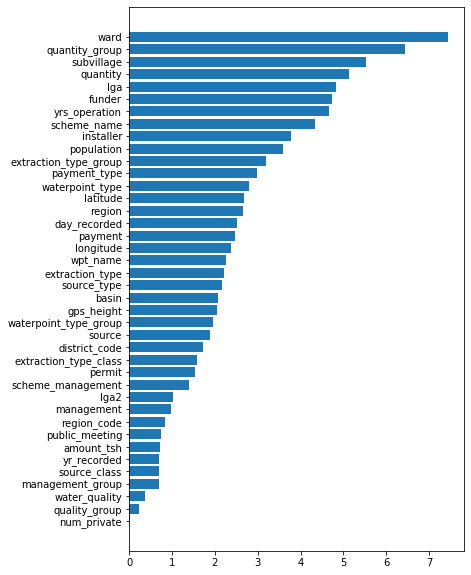

In [64]:
a, b = zip(*sorted(list(zip(cbc2.feature_importances_, X.columns))))
plt.figure(figsize=(6,10))
plt.barh(b, a)

In [34]:
a = [1,2,3,0]

In [36]:
list(a).sort()

In [15]:
cbc2 = CBC(random_seed=22, task_type='GPU', early_stopping_rounds=30, 
          l2_leaf_reg=1, depth=12, iterations=500)
cbc2.fit(X_train, y_train, cat_features=X.select_dtypes('object').columns, eval_set=(X_test, y_test))
print(cbc2.score(X_train, y_train), '---------------------------------------------')
print(cbc2.score(X_test, y_test), '---------------------------------------------')


0:	learn: 1.0828157	test: 1.0831814	best: 1.0831814 (0)	total: 1.44s	remaining: 11m 57s
1:	learn: 1.0655250	test: 1.0659194	best: 1.0659194 (1)	total: 2.8s	remaining: 11m 36s
2:	learn: 1.0491665	test: 1.0497385	best: 1.0497385 (2)	total: 4.17s	remaining: 11m 30s
3:	learn: 1.0351904	test: 1.0358247	best: 1.0358247 (3)	total: 5.51s	remaining: 11m 23s
4:	learn: 1.0166326	test: 1.0173123	best: 1.0173123 (4)	total: 6.97s	remaining: 11m 30s
5:	learn: 0.9977751	test: 0.9987117	best: 0.9987117 (5)	total: 8.35s	remaining: 11m 27s
6:	learn: 0.9804827	test: 0.9814761	best: 0.9814761 (6)	total: 9.76s	remaining: 11m 27s
7:	learn: 0.9661180	test: 0.9670223	best: 0.9670223 (7)	total: 11.1s	remaining: 11m 25s
8:	learn: 0.9548829	test: 0.9560780	best: 0.9560780 (8)	total: 12.6s	remaining: 11m 25s
9:	learn: 0.9402128	test: 0.9411737	best: 0.9411737 (9)	total: 14s	remaining: 11m 27s
10:	learn: 0.9238546	test: 0.9252977	best: 0.9252977 (10)	total: 15.7s	remaining: 11m 37s
11:	learn: 0.9079417	test: 0.9095

92:	learn: 0.5237656	test: 0.5613851	best: 0.5613851 (92)	total: 2m 23s	remaining: 10m 27s
93:	learn: 0.5223907	test: 0.5605419	best: 0.5605419 (93)	total: 2m 25s	remaining: 10m 26s
94:	learn: 0.5211347	test: 0.5595185	best: 0.5595185 (94)	total: 2m 26s	remaining: 10m 24s
95:	learn: 0.5198192	test: 0.5584856	best: 0.5584856 (95)	total: 2m 27s	remaining: 10m 22s
96:	learn: 0.5184634	test: 0.5574941	best: 0.5574941 (96)	total: 2m 29s	remaining: 10m 21s
97:	learn: 0.5172679	test: 0.5566775	best: 0.5566775 (97)	total: 2m 30s	remaining: 10m 19s
98:	learn: 0.5159760	test: 0.5558912	best: 0.5558912 (98)	total: 2m 32s	remaining: 10m 17s
99:	learn: 0.5150098	test: 0.5551929	best: 0.5551929 (99)	total: 2m 34s	remaining: 10m 16s
100:	learn: 0.5138714	test: 0.5544122	best: 0.5544122 (100)	total: 2m 35s	remaining: 10m 14s
101:	learn: 0.5125229	test: 0.5537857	best: 0.5537857 (101)	total: 2m 37s	remaining: 10m 12s
102:	learn: 0.5110992	test: 0.5528913	best: 0.5528913 (102)	total: 2m 38s	remaining: 1

182:	learn: 0.4384801	test: 0.5142989	best: 0.5142989 (182)	total: 4m 45s	remaining: 8m 14s
183:	learn: 0.4375443	test: 0.5139785	best: 0.5139785 (183)	total: 4m 47s	remaining: 8m 13s
184:	learn: 0.4367166	test: 0.5136285	best: 0.5136285 (184)	total: 4m 48s	remaining: 8m 11s
185:	learn: 0.4363101	test: 0.5134321	best: 0.5134321 (185)	total: 4m 50s	remaining: 8m 9s
186:	learn: 0.4355406	test: 0.5132848	best: 0.5132848 (186)	total: 4m 51s	remaining: 8m 8s
187:	learn: 0.4348921	test: 0.5131469	best: 0.5131469 (187)	total: 4m 53s	remaining: 8m 6s
188:	learn: 0.4343336	test: 0.5129840	best: 0.5129840 (188)	total: 4m 54s	remaining: 8m 5s
189:	learn: 0.4334447	test: 0.5125725	best: 0.5125725 (189)	total: 4m 56s	remaining: 8m 3s
190:	learn: 0.4327926	test: 0.5122293	best: 0.5122293 (190)	total: 4m 58s	remaining: 8m 2s
191:	learn: 0.4321909	test: 0.5119897	best: 0.5119897 (191)	total: 4m 59s	remaining: 8m
192:	learn: 0.4315976	test: 0.5117042	best: 0.5117042 (192)	total: 5m 1s	remaining: 7m 58s

272:	learn: 0.3870303	test: 0.4992336	best: 0.4992336 (272)	total: 7m 4s	remaining: 5m 53s
273:	learn: 0.3866490	test: 0.4991490	best: 0.4991490 (273)	total: 7m 6s	remaining: 5m 51s
274:	learn: 0.3862866	test: 0.4990205	best: 0.4990205 (274)	total: 7m 8s	remaining: 5m 50s
275:	learn: 0.3860176	test: 0.4989513	best: 0.4989513 (275)	total: 7m 9s	remaining: 5m 48s
276:	learn: 0.3854552	test: 0.4988446	best: 0.4988446 (276)	total: 7m 11s	remaining: 5m 47s
277:	learn: 0.3851102	test: 0.4987574	best: 0.4987574 (277)	total: 7m 12s	remaining: 5m 45s
278:	learn: 0.3847682	test: 0.4985899	best: 0.4985899 (278)	total: 7m 14s	remaining: 5m 44s
279:	learn: 0.3841704	test: 0.4985418	best: 0.4985418 (279)	total: 7m 16s	remaining: 5m 42s
280:	learn: 0.3837076	test: 0.4984261	best: 0.4984261 (280)	total: 7m 18s	remaining: 5m 41s
281:	learn: 0.3832893	test: 0.4983216	best: 0.4983216 (281)	total: 7m 19s	remaining: 5m 39s
282:	learn: 0.3829213	test: 0.4982092	best: 0.4982092 (282)	total: 7m 21s	remaining:

362:	learn: 0.3492775	test: 0.4917741	best: 0.4917741 (362)	total: 9m 25s	remaining: 3m 33s
363:	learn: 0.3488223	test: 0.4916794	best: 0.4916794 (363)	total: 9m 26s	remaining: 3m 31s
364:	learn: 0.3484546	test: 0.4916166	best: 0.4916166 (364)	total: 9m 28s	remaining: 3m 30s
365:	learn: 0.3482409	test: 0.4915987	best: 0.4915987 (365)	total: 9m 29s	remaining: 3m 28s
366:	learn: 0.3477909	test: 0.4914981	best: 0.4914981 (366)	total: 9m 31s	remaining: 3m 27s
367:	learn: 0.3474552	test: 0.4914302	best: 0.4914302 (367)	total: 9m 33s	remaining: 3m 25s
368:	learn: 0.3470866	test: 0.4913473	best: 0.4913473 (368)	total: 9m 34s	remaining: 3m 23s
369:	learn: 0.3467989	test: 0.4912938	best: 0.4912938 (369)	total: 9m 35s	remaining: 3m 22s
370:	learn: 0.3464183	test: 0.4912260	best: 0.4912260 (370)	total: 9m 37s	remaining: 3m 20s
371:	learn: 0.3459249	test: 0.4911005	best: 0.4911005 (371)	total: 9m 39s	remaining: 3m 19s
372:	learn: 0.3455996	test: 0.4910586	best: 0.4910586 (372)	total: 9m 40s	remain

451:	learn: 0.3193541	test: 0.4879954	best: 0.4879954 (451)	total: 11m 42s	remaining: 1m 14s
452:	learn: 0.3191544	test: 0.4879537	best: 0.4879537 (452)	total: 11m 43s	remaining: 1m 13s
453:	learn: 0.3187327	test: 0.4878957	best: 0.4878957 (453)	total: 11m 45s	remaining: 1m 11s
454:	learn: 0.3185592	test: 0.4878878	best: 0.4878878 (454)	total: 11m 46s	remaining: 1m 9s
455:	learn: 0.3182821	test: 0.4878709	best: 0.4878709 (455)	total: 11m 48s	remaining: 1m 8s
456:	learn: 0.3179972	test: 0.4878834	best: 0.4878709 (455)	total: 11m 49s	remaining: 1m 6s
457:	learn: 0.3176886	test: 0.4878410	best: 0.4878410 (457)	total: 11m 51s	remaining: 1m 5s
458:	learn: 0.3173937	test: 0.4877820	best: 0.4877820 (458)	total: 11m 52s	remaining: 1m 3s
459:	learn: 0.3171990	test: 0.4877758	best: 0.4877758 (459)	total: 11m 54s	remaining: 1m 2s
460:	learn: 0.3170106	test: 0.4877457	best: 0.4877457 (460)	total: 11m 56s	remaining: 1m
461:	learn: 0.3167527	test: 0.4877208	best: 0.4877208 (461)	total: 11m 57s	remai

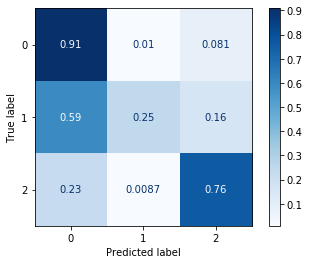

In [20]:
PCM(cbc2, X_test, y_test, normalize='true', cmap='Blues')

In [22]:
cbc2.feature_importances_

array([0.72455205, 4.73332376, 2.04276547, 3.76691099, 2.37674356,
       2.6909617 , 2.26330915, 0.01201239, 2.0802263 , 5.52208402,
       2.65756009, 0.84093855, 1.72559816, 4.83077413, 7.4430846 ,
       3.59143776, 0.75335678, 1.39855881, 4.33057548, 1.53799741,
       2.21041605, 3.184109  , 1.5870385 , 0.977153  , 0.69106377,
       2.47995106, 2.97450493, 0.36187059, 0.21926072, 5.14030261,
       6.43339529, 1.88417615, 2.16571515, 0.70225687, 2.79697752,
       1.95527346, 4.67213327, 0.70594521, 2.50841061, 1.02727509])

In [75]:
df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [76]:
df[df.quantity_group == 'seasonal'].status_group.value_counts()

functional                 2325
non functional             1309
functional needs repair     416
Name: status_group, dtype: int64